In [3]:
import loompy as lp
import pandas as pd

# human embryo
# activating

loom = lp.connect("/Users/marwanbakr/docs/kimlab/scRNA-seq/human_heart/human_heart_developing/human_ivs_ra_ccs_raw_reg_mingenes5_20241003_activatingonly_aucell.loom", mode='r+', validate=False)
auc_mtx_hsea = pd.DataFrame(loom.ca.RegulonsAUC, index=loom.ca.CellID)
auc_mtx_hsea.to_csv("/Users/marwanbakr/docs/kimlab/scRNA-seq/human_heart/human_heart_developing/human_ivs_ra_ccs_raw_reg_mingenes5_20241003_activatingonly_auc_mtx.csv")

# repressing

loom = lp.connect("/Users/marwanbakr/docs/kimlab/scRNA-seq/human_heart/human_heart_developing/human_ivs_ra_ccs_raw_reg_mingenes5_20241003_repressingonly_aucell.loom", mode='r+', validate=False)
auc_mtx_hser = pd.DataFrame(loom.ca.RegulonsAUC, index=loom.ca.CellID)
auc_mtx_hser.to_csv("/Users/marwanbakr/docs/kimlab/scRNA-seq/human_heart/human_heart_developing/human_ivs_ra_ccs_raw_reg_mingenes5_20241003_repressingonly_auc_mtx.csv")

/Users/marwanbakr/anaconda3/lib/python3.10/site-packages/loompy/bus_file.py:68: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def twobit_to_dna(twobit: int, size: int) -> str:
/Users/marwanbakr/anaconda3/lib/python3.10/site-packages/loompy/bus_file.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def dna_to_twobit(dna: str) -> int:
/Users/marwanbakr/anaconda

In [4]:
# human adult
# activating

loom = lp.connect("/Users/marwanbakr/docs/kimlab/scRNA-seq/human_heart/san_avn_ax_cm_raw_reg_mingenes5_activatingonly_aucell.loom", mode='r+', validate=False)
auc_mtx_hsaa = pd.DataFrame(loom.ca.RegulonsAUC, index=loom.ca.CellID)
auc_mtx_hsaa.to_csv("/Users/marwanbakr/docs/kimlab/scRNA-seq/human_heart/san_avn_ax_cm_raw_mingenes5_activatingonly_auc_mtx.csv")

# repressing

loom = lp.connect("/Users/marwanbakr/docs/kimlab/scRNA-seq/human_heart/san_avn_ax_cm_raw_reg_mingenes5_repressingonly_aucell.loom", mode='r+', validate=False)
auc_mtx_hsar = pd.DataFrame(loom.ca.RegulonsAUC, index=loom.ca.CellID)
auc_mtx_hsar.to_csv("/Users/marwanbakr/docs/kimlab/scRNA-seq/human_heart/san_avn_ax_cm_raw_mingenes5_repressingonly_auc_mtx.csv")

In [33]:
meta_hse = pd.read_csv("/Users/marwanbakr/docs/kimlab/scRNA-seq/human_heart/human_heart_developing/fcm_scenic_meta.csv")
meta_hsa = pd.read_csv("/Users/marwanbakr/docs/kimlab/scRNA-seq/human_heart/kcm_sub_meta.csv")

In [4]:
auc_mtx_hsea = auc_mtx_hsea.merge(meta_hse, left_index=True, right_on='Unnamed: 0')
mean_auc_mtx_hsea = auc_mtx_hsea.groupby('sub_ccs_onesan').mean()
mean_auc_mtx_hsea = mean_auc_mtx_hsea.loc[['SA node', 'Compact AVN', 'His bundle', 'Purkinje fibers', 'aCM', 'vCM']]
mean_auc_mtx_hsea = (mean_auc_mtx_hsea - mean_auc_mtx_hsea.mean()) / mean_auc_mtx_hsea.std()
mean_auc_mtx_hsea

<ipython-input-4-fcc533114869>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_auc_mtx_hsea = auc_mtx_hsea.groupby('sub_ccs_onesan').mean()


,ARID3A(+),ARNT2(+),ARNTL(+),ASCL1(+),ATF1(+),ATF3(+),ATF4(+),ATF5(+),ATF7(+),BACH1(+),...,ZSCAN29(+),ZSCAN31(+),nCount_RNA,nFeature_RNA,percent.mt,Rep,Age,RNA_snn_res.0.8,seurat_clusters,clusters
sub_ccs_onesan,,,,,,,,,,,,,,,,,,,,,
SA node,1.480912,-0.890618,0.559336,2.018457,-0.434698,-1.161667,-0.140124,-0.057886,-0.066172,1.839551,...,0.080978,-0.032310,-1.030512,-0.806105,0.254785,-1.836956,-1.101466,-0.294346,-0.294346,0.906532
Compact AVN,0.958651,0.718306,0.259221,-0.337348,0.196773,0.684750,1.251605,0.830855,1.078390,0.413986,...,-0.921258,1.178588,-0.407662,0.205006,-1.229317,0.630678,-0.655852,1.063004,1.063004,1.020467
His bundle,-0.214280,-0.845579,-0.849608,-0.698886,1.434263,1.207761,0.781968,1.509379,-1.117610,-0.445208,...,-0.042675,0.999536,-0.516473,-0.453913,-0.934513,0.709886,-0.554326,0.787345,0.787345,-1.019387
Purkinje fibers,-0.486197,0.078624,-0.714200,-0.322964,0.619398,-0.220105,-1.001221,-0.342152,-0.465872,-0.893666,...,0.340139,-1.363028,-0.033913,-0.269546,-0.274974,-0.328088,-0.145314,0.169002,0.169002,-0.959954
aCM,-0.653469,-0.654764,1.619688,-0.361003,-1.492293,-1.134030,-1.283340,-1.090218,1.335260,-0.335853,...,-1.121410,-0.863936,1.868001,1.917717,1.304108,0.783977,1.158055,0.044992,0.044992,0.792597
vCM,-1.085617,1.594031,-0.874438,-0.298256,-0.323442,0.623290,0.391113,-0.849978,-0.763996,-0.578809,...,1.664226,0.081150,0.120560,-0.593159,0.879911,0.040504,1.298902,-1.769996,-1.769996,-0.740254


In [5]:
auc_mtx_hsaa = auc_mtx_hsaa.merge(meta_hsa, left_index=True, right_on='Unnamed: 0')
mean_auc_mtx_hsaa = auc_mtx_hsaa.groupby('sub_ccs').mean()
mean_auc_mtx_hsaa = mean_auc_mtx_hsaa.loc[['SA node', 'Compact AV node', 'His bundle', 'Purkinje fibers', 'aCM', 'vCM']]
mean_auc_mtx_hsaa = (mean_auc_mtx_hsaa - mean_auc_mtx_hsaa.mean()) / mean_auc_mtx_hsaa.std()
mean_auc_mtx_hsaa

<ipython-input-5-21983eb5021b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_auc_mtx_hsaa = auc_mtx_hsaa.groupby('sub_ccs').mean()


,ALX4(+),ARID3A(+),ATF3(+),ATF6B(+),BACH1(+),BACH2(+),BCL6(+),BCLAF1(+),BHLHE41(+),BPTF(+),...,cell_state_scNym_confidence,latent_RT_efficiency,latent_cell_probability,latent_scale,n_counts,X_scvi_batch,X_scvi_labels,leiden_scArches,nCount_RNA,nFeature_RNA
sub_ccs,,,,,,,,,,,,,,,,,,,,,
SA node,-0.843282,-0.586833,-0.691588,-0.799897,-1.320176,-0.502879,-0.219725,0.237934,1.845443,0.952033,...,0.924110,-0.753023,0.361479,1.369107,-0.033151,-1.030720,NaN,-1.022677,0.652203,1.178571
Compact AV node,1.382418,-0.313780,-0.097572,-0.369365,0.169672,1.717519,1.418626,1.138729,0.143439,0.351371,...,0.529614,0.795082,-0.263708,-0.754538,0.637944,0.795359,NaN,-0.737366,1.026695,0.881074
His bundle,0.619614,-0.989669,-0.358534,-0.607588,1.652842,0.619780,0.813859,0.706895,-0.750232,0.671522,...,-1.935698,1.228034,1.088719,-0.497055,1.318871,-0.158819,NaN,0.202157,0.078019,0.177512
Purkinje fibers,0.628836,1.854747,2.003701,1.520471,0.113756,-0.403781,-0.645556,-1.389150,-0.041125,-1.654965,...,0.030846,NaN,NaN,NaN,NaN,NaN,NaN,1.407952,0.631387,0.048408
aCM,-0.912623,-0.243965,-0.462978,-0.740681,-0.691279,-0.378637,-0.003348,0.351419,-0.980987,0.443813,...,0.314704,-1.128080,-1.570640,0.748166,-0.928174,-0.852222,NaN,-0.754487,-0.830974,-0.835437
vCM,-0.874962,0.279499,-0.393030,0.997060,0.075185,-1.052002,-1.363855,-1.045826,-0.216537,-0.763774,...,0.136424,-0.142012,0.384150,-0.865680,-0.995490,1.246401,NaN,0.904421,-1.557329,-1.450127


In [6]:
# combine common regulons

# add species identifier
mean_auc_mtx_hsea.index = [f"{i}_e" for i in mean_auc_mtx_hsea.index]
mean_auc_mtx_hsaa.index = [f"{i}_a" for i in mean_auc_mtx_hsaa.index]

auc_combined = pd.concat([mean_auc_mtx_hsea, mean_auc_mtx_hsaa])
auc_combined = auc_combined.dropna(axis=1)
auc_combined = auc_combined.drop('nCount_RNA', axis=1)
auc_combined = auc_combined.drop('nFeature_RNA', axis=1)
auc_combined

,ARID3A(+),ATF3(+),BACH1(+),BACH2(+),BCL6(+),BCLAF1(+),BHLHE41(+),BPTF(+),CEBPA(+),CEBPB(+),...,YY1(+),ZBTB21(+),ZBTB25(+),ZBTB7A(+),ZEB1(+),ZFY(+),ZNF266(+),ZNF267(+),ZNF580(+),ZNF629(+)
SA node_e,1.480912,-1.161667,1.839551,1.449621,1.395742,1.566802,2.025294,1.605333,-1.527190,-0.930888,...,1.812128,0.569050,0.551780,1.685334,-0.550345,1.069905,1.648257,2.004158,0.233252,-0.078622
Compact AVN_e,0.958651,0.684750,0.413986,0.003928,1.067125,-0.411035,-0.447778,-0.145964,0.695415,0.094097,...,0.123200,1.329943,-0.615676,0.370273,-1.369511,-0.396353,-0.019121,-0.066166,1.390935,-0.294964
His bundle_e,-0.214280,1.207761,-0.445208,-1.252306,-0.111517,-0.510031,-0.361747,-1.310566,1.389556,1.673314,...,-0.590589,0.616859,-1.650223,-0.999349,-0.676734,-1.432052,-1.247049,-0.451208,0.630256,0.925454
Purkinje fibers_e,-0.486197,-0.220105,-0.893666,-0.749744,-0.816791,-0.981171,-0.511606,-0.281064,-0.405017,0.129722,...,-0.990149,-1.078177,0.307663,-0.865445,1.009013,-0.223811,-0.551702,-0.370074,0.006226,1.278423
aCM_e,-0.653469,-1.134030,-0.335853,-0.281525,-0.599756,0.908358,-0.183030,-0.479888,-0.273251,-1.131571,...,0.215743,-0.312022,0.198487,0.262819,0.587287,-0.255462,0.537021,-0.472020,-0.959569,-1.523833
vCM_e,-1.085617,0.623290,-0.578809,0.830026,-0.934804,-0.572923,-0.521133,0.612150,0.120487,0.165325,...,-0.570333,-1.125653,1.207970,-0.453632,1.000290,1.237772,-0.367406,-0.644691,-1.301099,-0.306458
SA node_a,-0.586833,-0.691588,-1.320176,-0.502879,-0.219725,0.237934,1.845443,0.952033,1.364329,-0.940958,...,0.177789,-0.513376,-0.053992,1.870079,-1.118607,0.136100,-1.009038,-0.050065,0.306779,-0.212565
Compact AV node_a,-0.313780,-0.097572,0.169672,1.717519,1.418626,1.138729,0.143439,0.351371,0.681112,0.484566,...,1.488270,1.394252,-1.243007,0.275439,-0.390663,-0.436632,-0.095271,0.265015,1.602945,1.111698
His bundle_a,-0.989669,-0.358534,1.652842,0.619780,0.813859,0.706895,-0.750232,0.671522,-0.072395,0.611268,...,0.520740,1.068438,-0.591085,-0.254551,1.395687,-1.105287,-1.243563,0.561514,0.093631,0.506541
Purkinje fibers_a,1.854747,2.003701,0.113756,-0.403781,-0.645556,-1.389150,-0.041125,-1.654965,-1.329565,1.436059,...,-1.309850,-0.519734,1.057540,-0.922869,1.059975,1.795180,1.403789,-0.987263,-1.416433,-0.691482


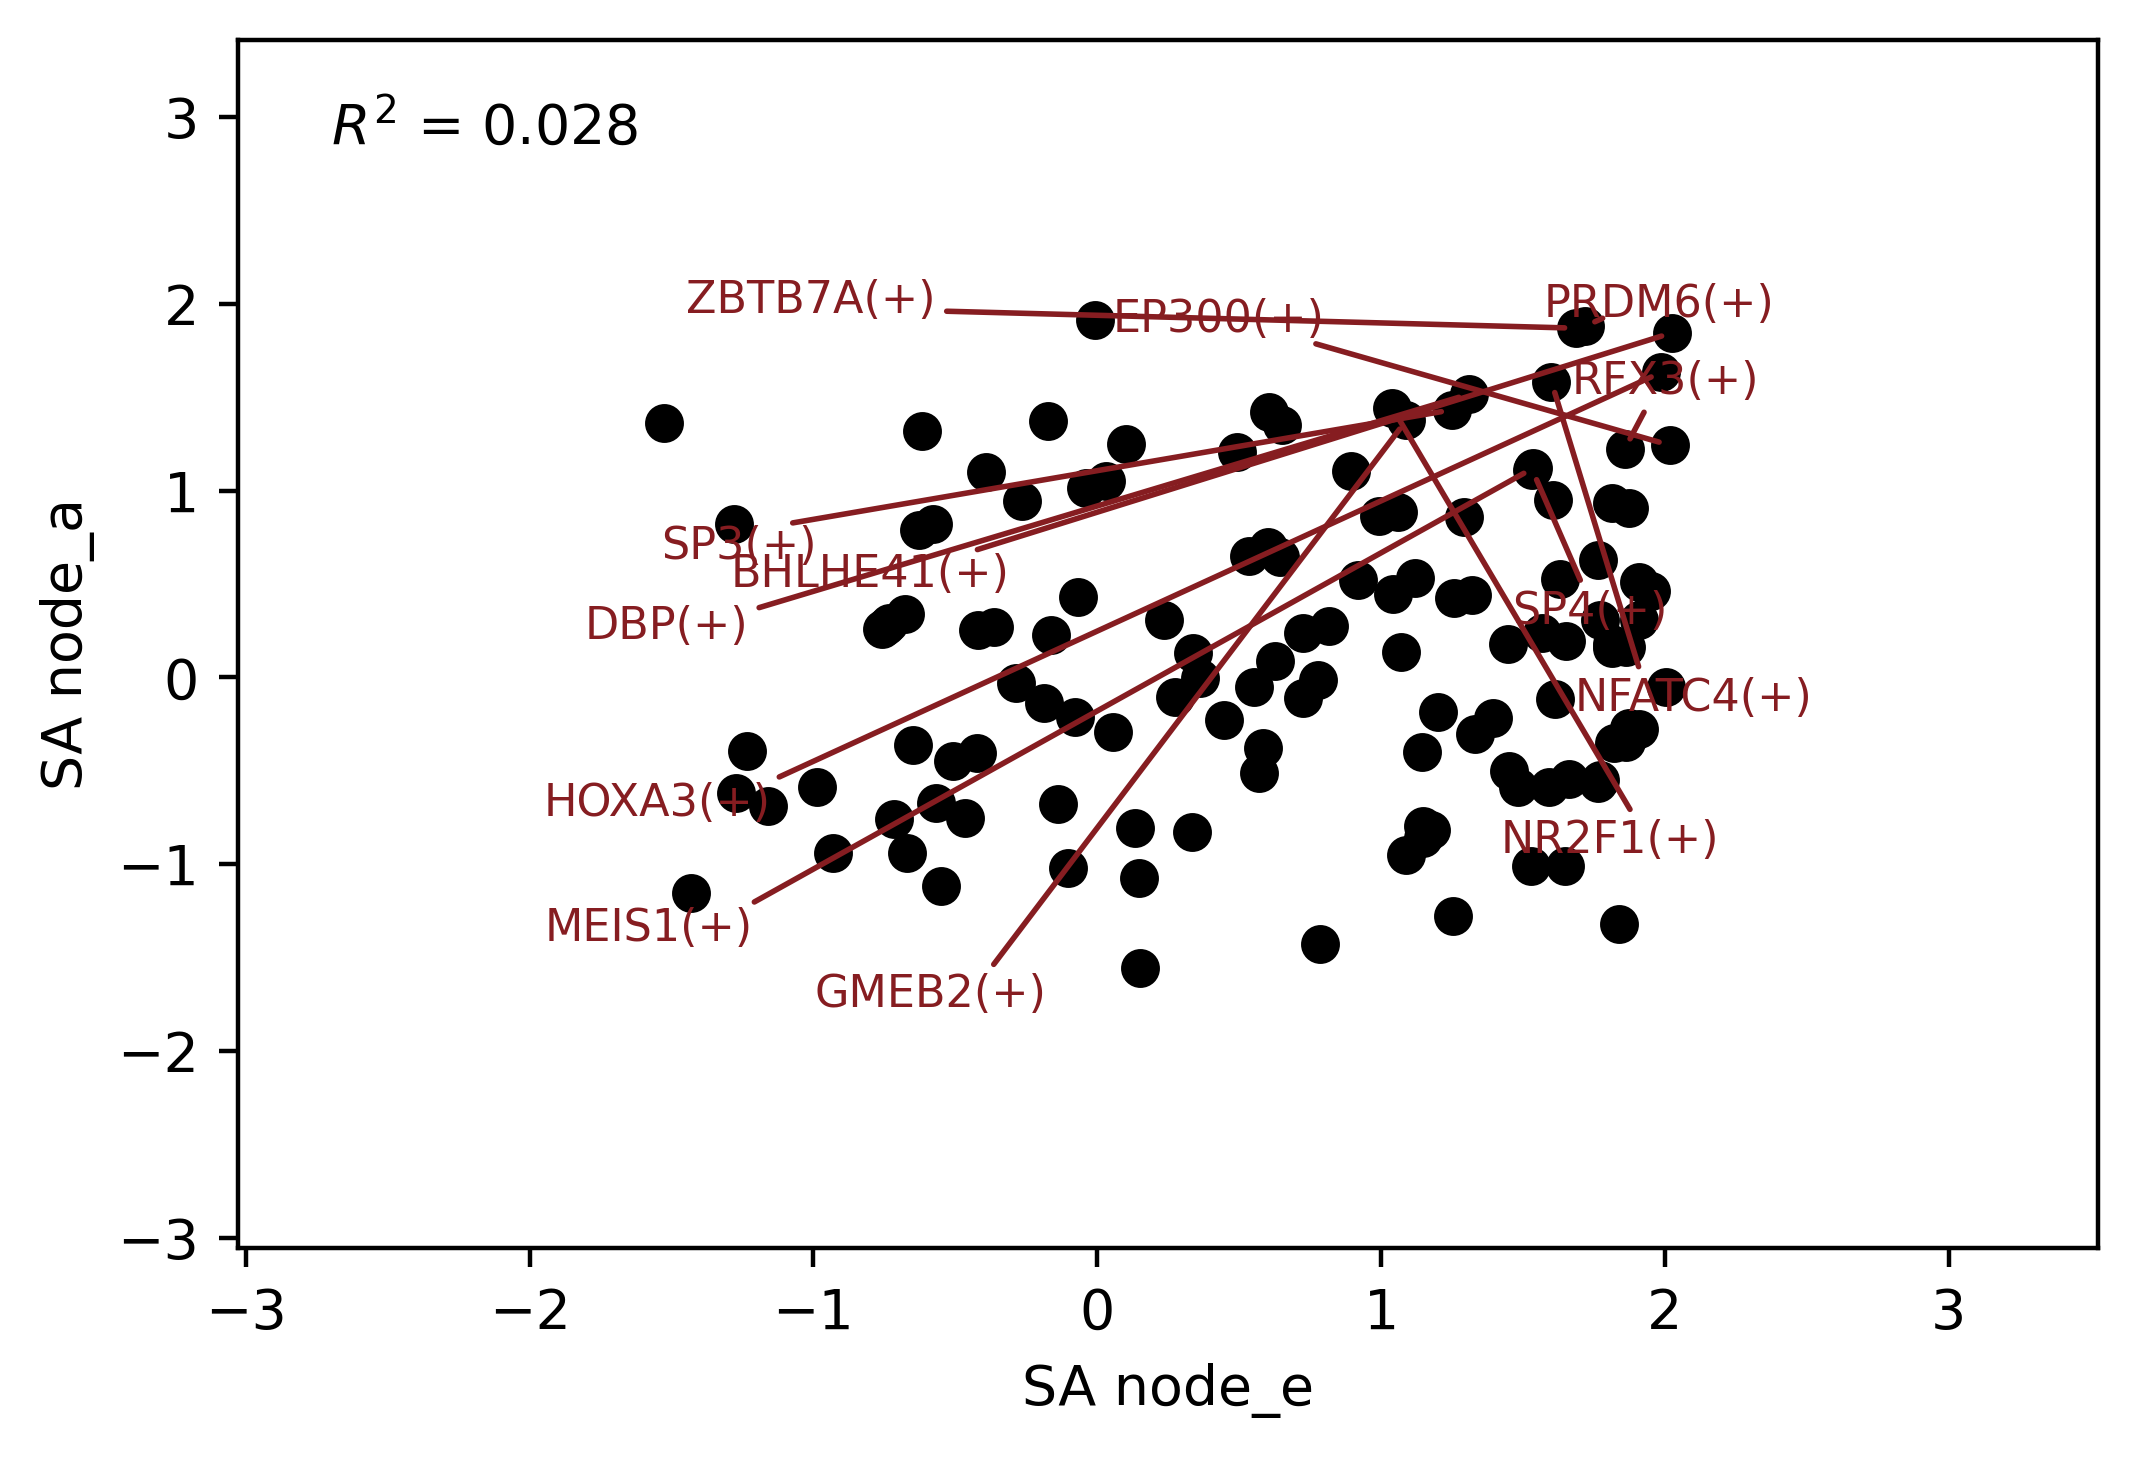

In [12]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from adjustText import adjust_text

plt.figure(dpi=400)
plt.scatter(auc_combined.loc['SA node_e'], auc_combined.loc['SA node_a'], c='black')

x_values = pd.Series(auc_combined.loc['SA node_e'])
y_values = pd.Series(auc_combined.loc['SA node_a'])

# Fit a linear regression model to calculate R²
model = LinearRegression()
model.fit(x_values.values.reshape(-1, 1), y_values.values)
r_squared = r2_score(y_values, model.predict(x_values.values.reshape(-1, 1)))

# Create a list to store the text annotations
texts = []

# Label points above a threshold on both axes
for i, row in pd.concat([x_values, y_values], axis=1).iterrows():
    x = row['SA node_e']
    y = row['SA node_a']
    
    if x > 1 and y > 1:
        texts.append(plt.text(x, y, i, fontsize=8, color='#861D21'))

# Adjust text to avoid overlap
adjust_text(
    texts,
    expand_text=(10, 10),
    arrowprops=dict(arrowstyle='-', color='#861D21', lw=1)
)

plt.xlim([min(x_values) - 1.5, max(x_values) + 1.5]) 
plt.ylim([min(y_values) - 1.5, max(y_values) + 1.5]) 
plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.3f}', transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top', color='black')
plt.xlabel('SA node_e')
plt.ylabel('SA node_a')
plt.show()

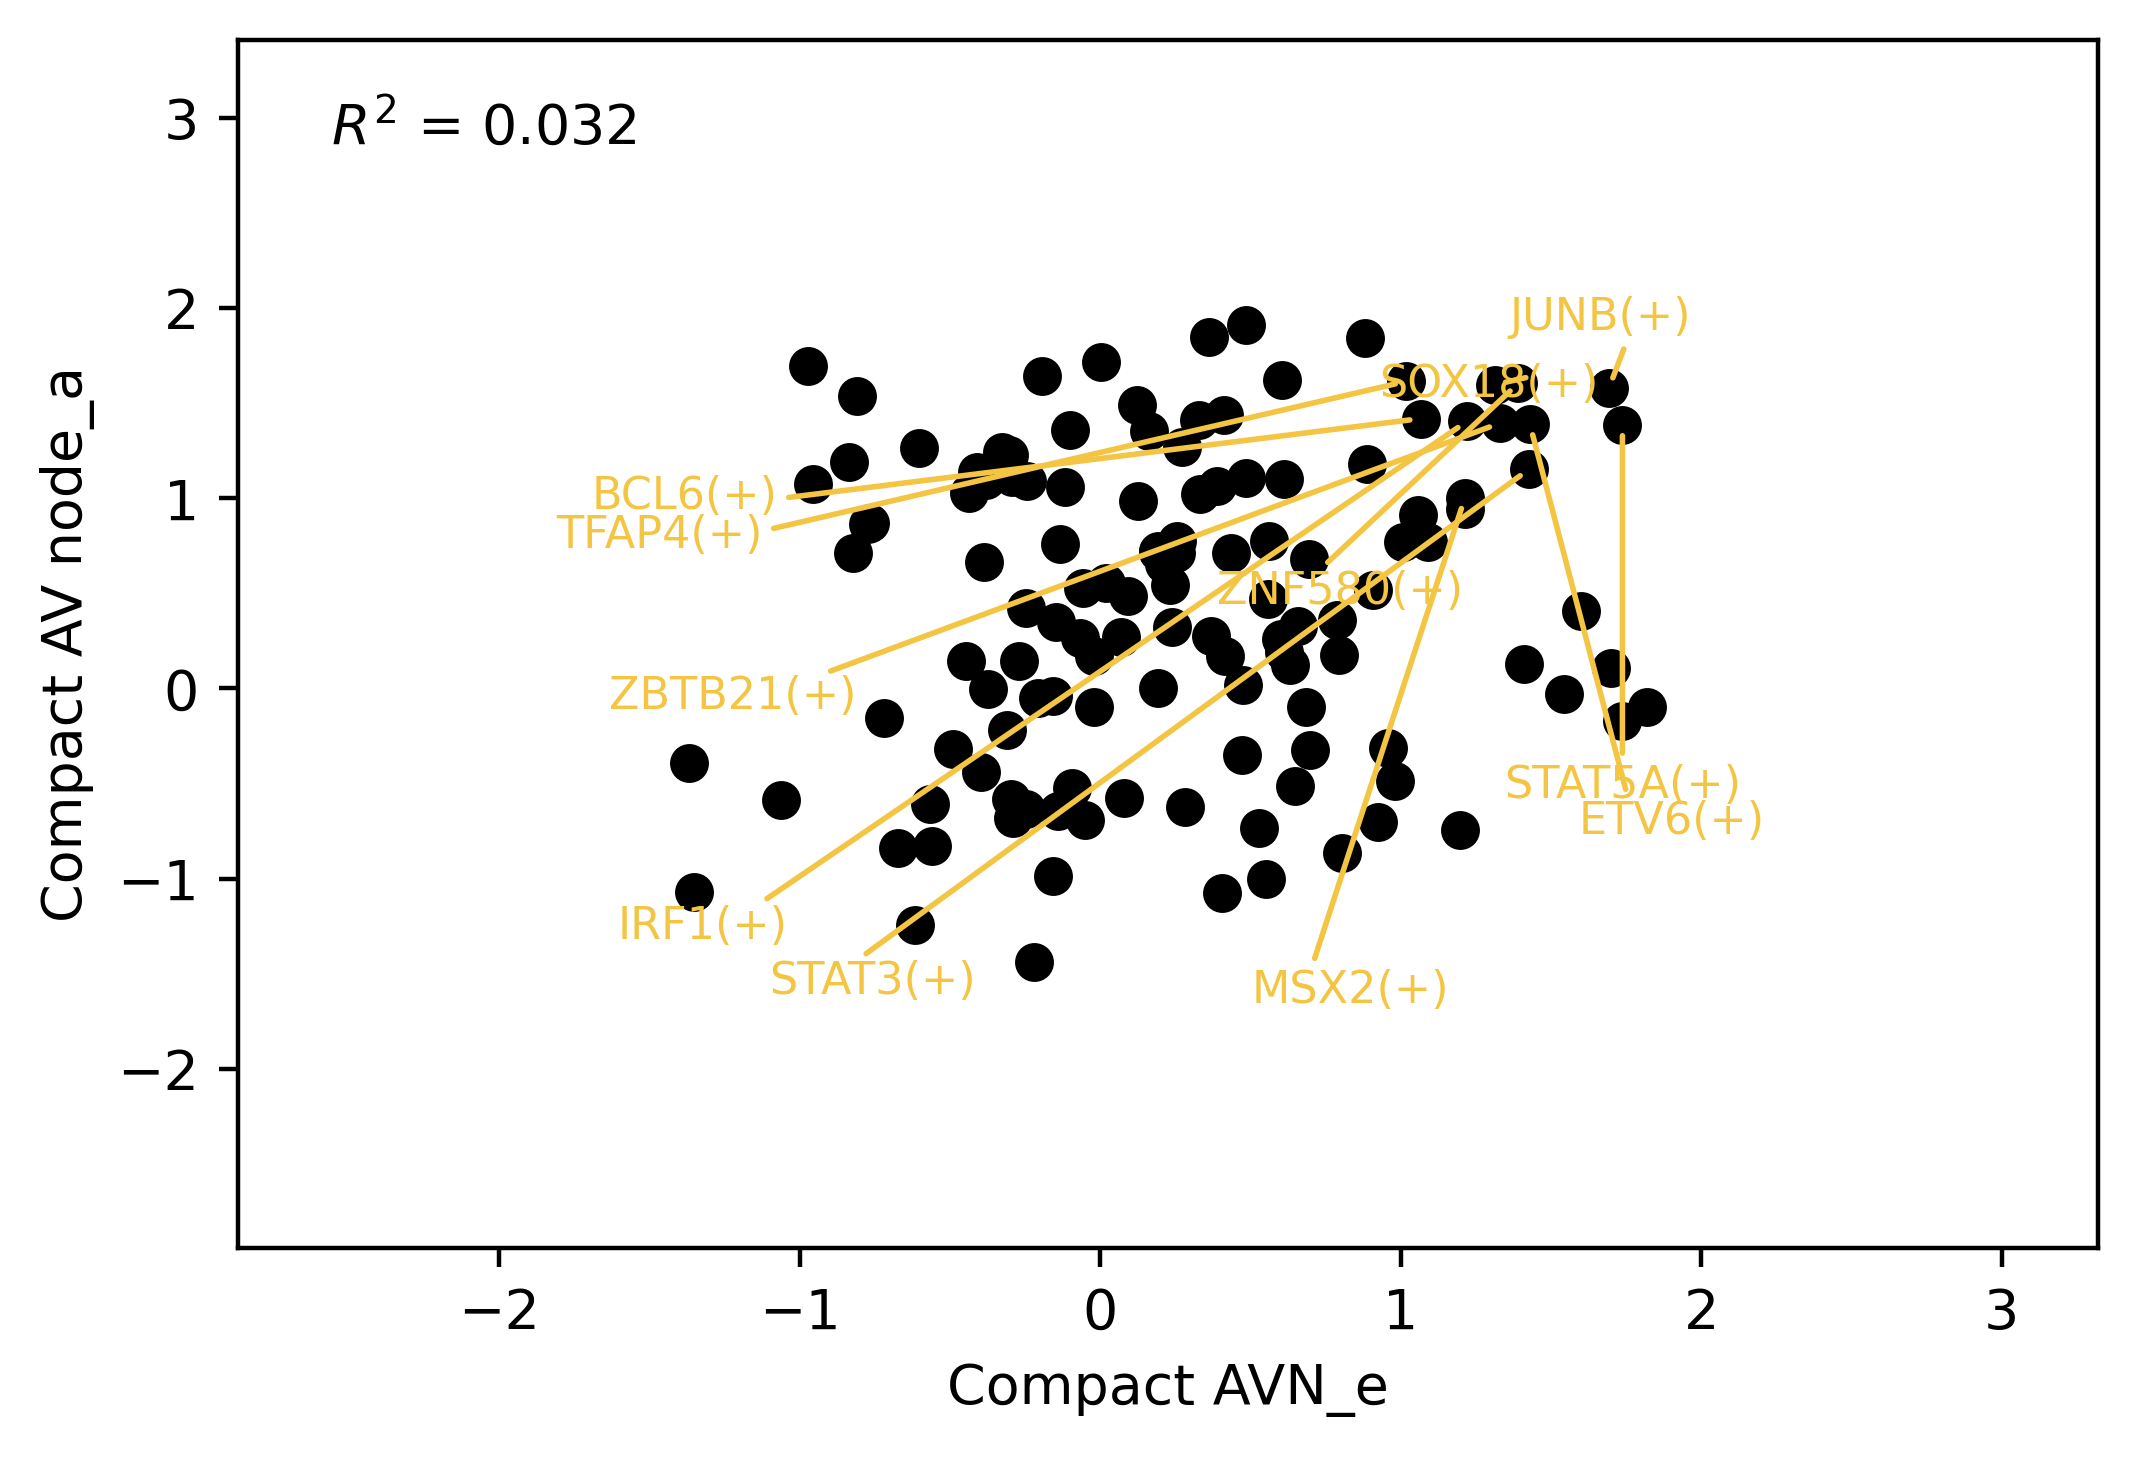

In [13]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from adjustText import adjust_text

plt.figure(dpi=400)
plt.scatter(auc_combined.loc['Compact AVN_e'], auc_combined.loc['Compact AV node_a'], c='black')

x_values = pd.Series(auc_combined.loc['Compact AVN_e'])
y_values = pd.Series(auc_combined.loc['Compact AV node_a'])

# Fit a linear regression model to calculate R²
model = LinearRegression()
model.fit(x_values.values.reshape(-1, 1), y_values.values)
r_squared = r2_score(y_values, model.predict(x_values.values.reshape(-1, 1)))

# Create a list to store the text annotations
texts = []

# Label points above a threshold on both axes
for i, row in pd.concat([x_values, y_values], axis=1).iterrows():
    x = row['Compact AVN_e']
    y = row['Compact AV node_a']
    
    if x > 1 and y > 1:
        texts.append(plt.text(x, y, i, fontsize=8, color='#F4C542'))

# Adjust text to avoid overlap
adjust_text(
    texts,
    expand_text=(10, 10),
    arrowprops=dict(arrowstyle='-', color='#F4C542', lw=1)
)

plt.xlim([min(x_values) - 1.5, max(x_values) + 1.5]) 
plt.ylim([min(y_values) - 1.5, max(y_values) + 1.5]) 
plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.3f}', transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top', color='black')
plt.xlabel('Compact AVN_e')
plt.ylabel('Compact AV node_a')
plt.show()

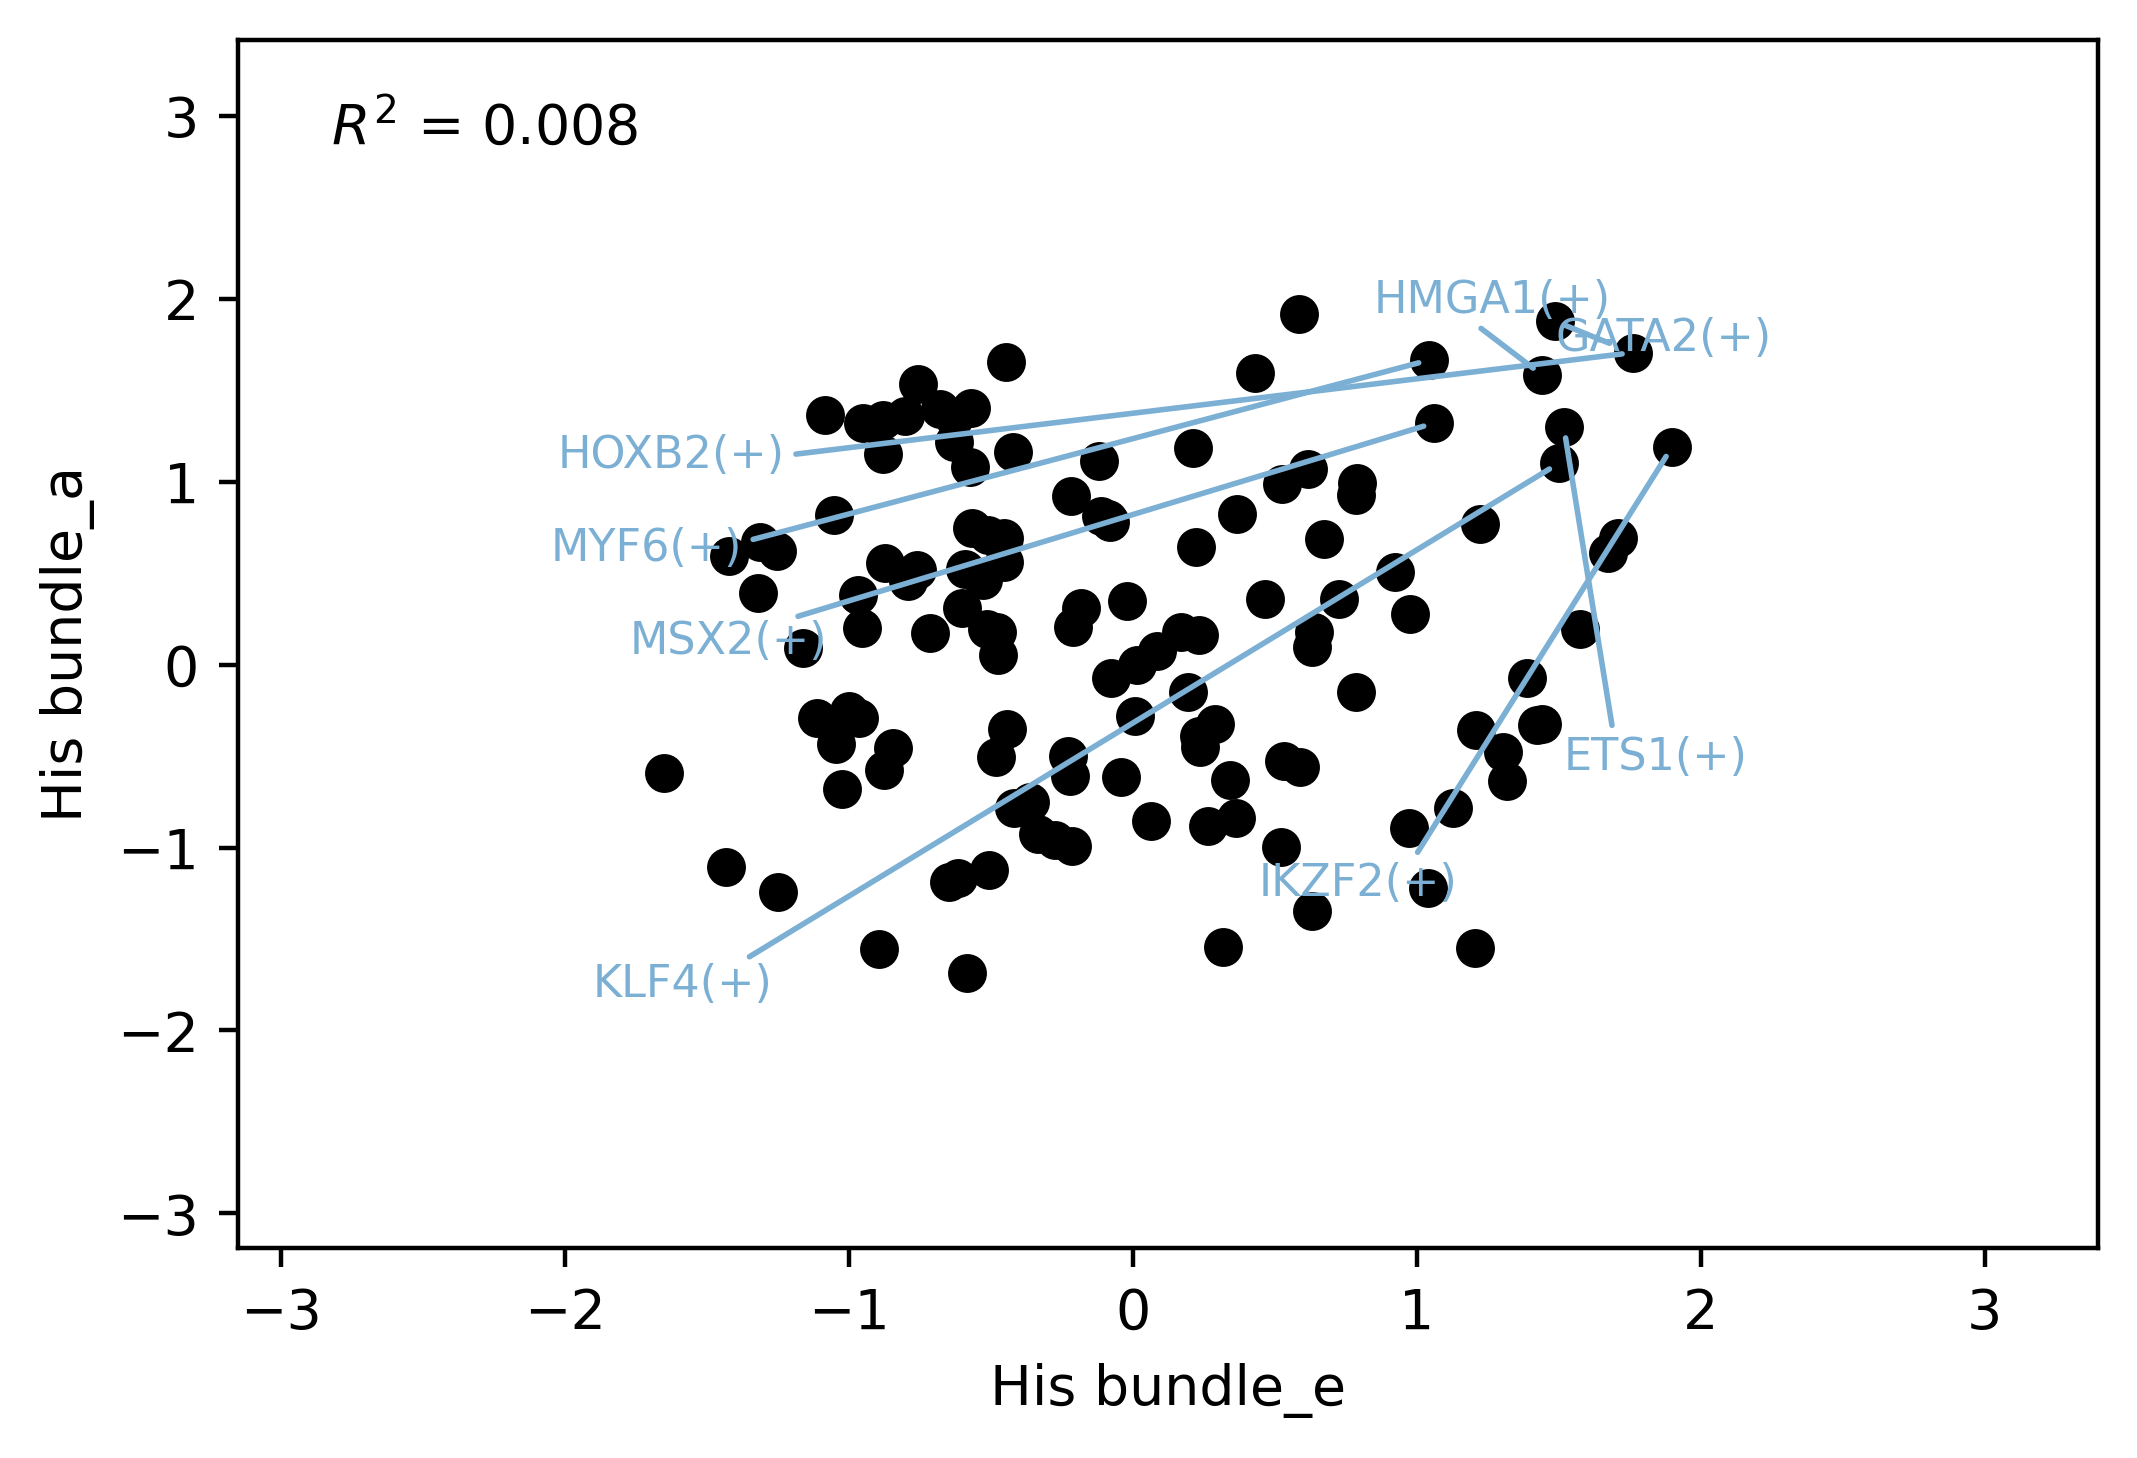

In [14]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from adjustText import adjust_text

plt.figure(dpi=400)
plt.scatter(auc_combined.loc['His bundle_e'], auc_combined.loc['His bundle_a'], c='black')

x_values = pd.Series(auc_combined.loc['His bundle_e'])
y_values = pd.Series(auc_combined.loc['His bundle_a'])

# Fit a linear regression model to calculate R²
model = LinearRegression()
model.fit(x_values.values.reshape(-1, 1), y_values.values)
r_squared = r2_score(y_values, model.predict(x_values.values.reshape(-1, 1)))

# Create a list to store the text annotations
texts = []

# Label points above a threshold on both axes
for i, row in pd.concat([x_values, y_values], axis=1).iterrows():
    x = row['His bundle_e']
    y = row['His bundle_a']
    
    if x > 1 and y > 1:
        texts.append(plt.text(x, y, i, fontsize=8, color='#7BAFD4'))

# Adjust text to avoid overlap
adjust_text(
    texts,
    expand_text=(10, 10),
    arrowprops=dict(arrowstyle='-', color='#7BAFD4', lw=1)
)

plt.xlim([min(x_values) - 1.5, max(x_values) + 1.5]) 
plt.ylim([min(y_values) - 1.5, max(y_values) + 1.5]) 
plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.3f}', transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top', color='black')
plt.xlabel('His bundle_e')
plt.ylabel('His bundle_a')
plt.show()

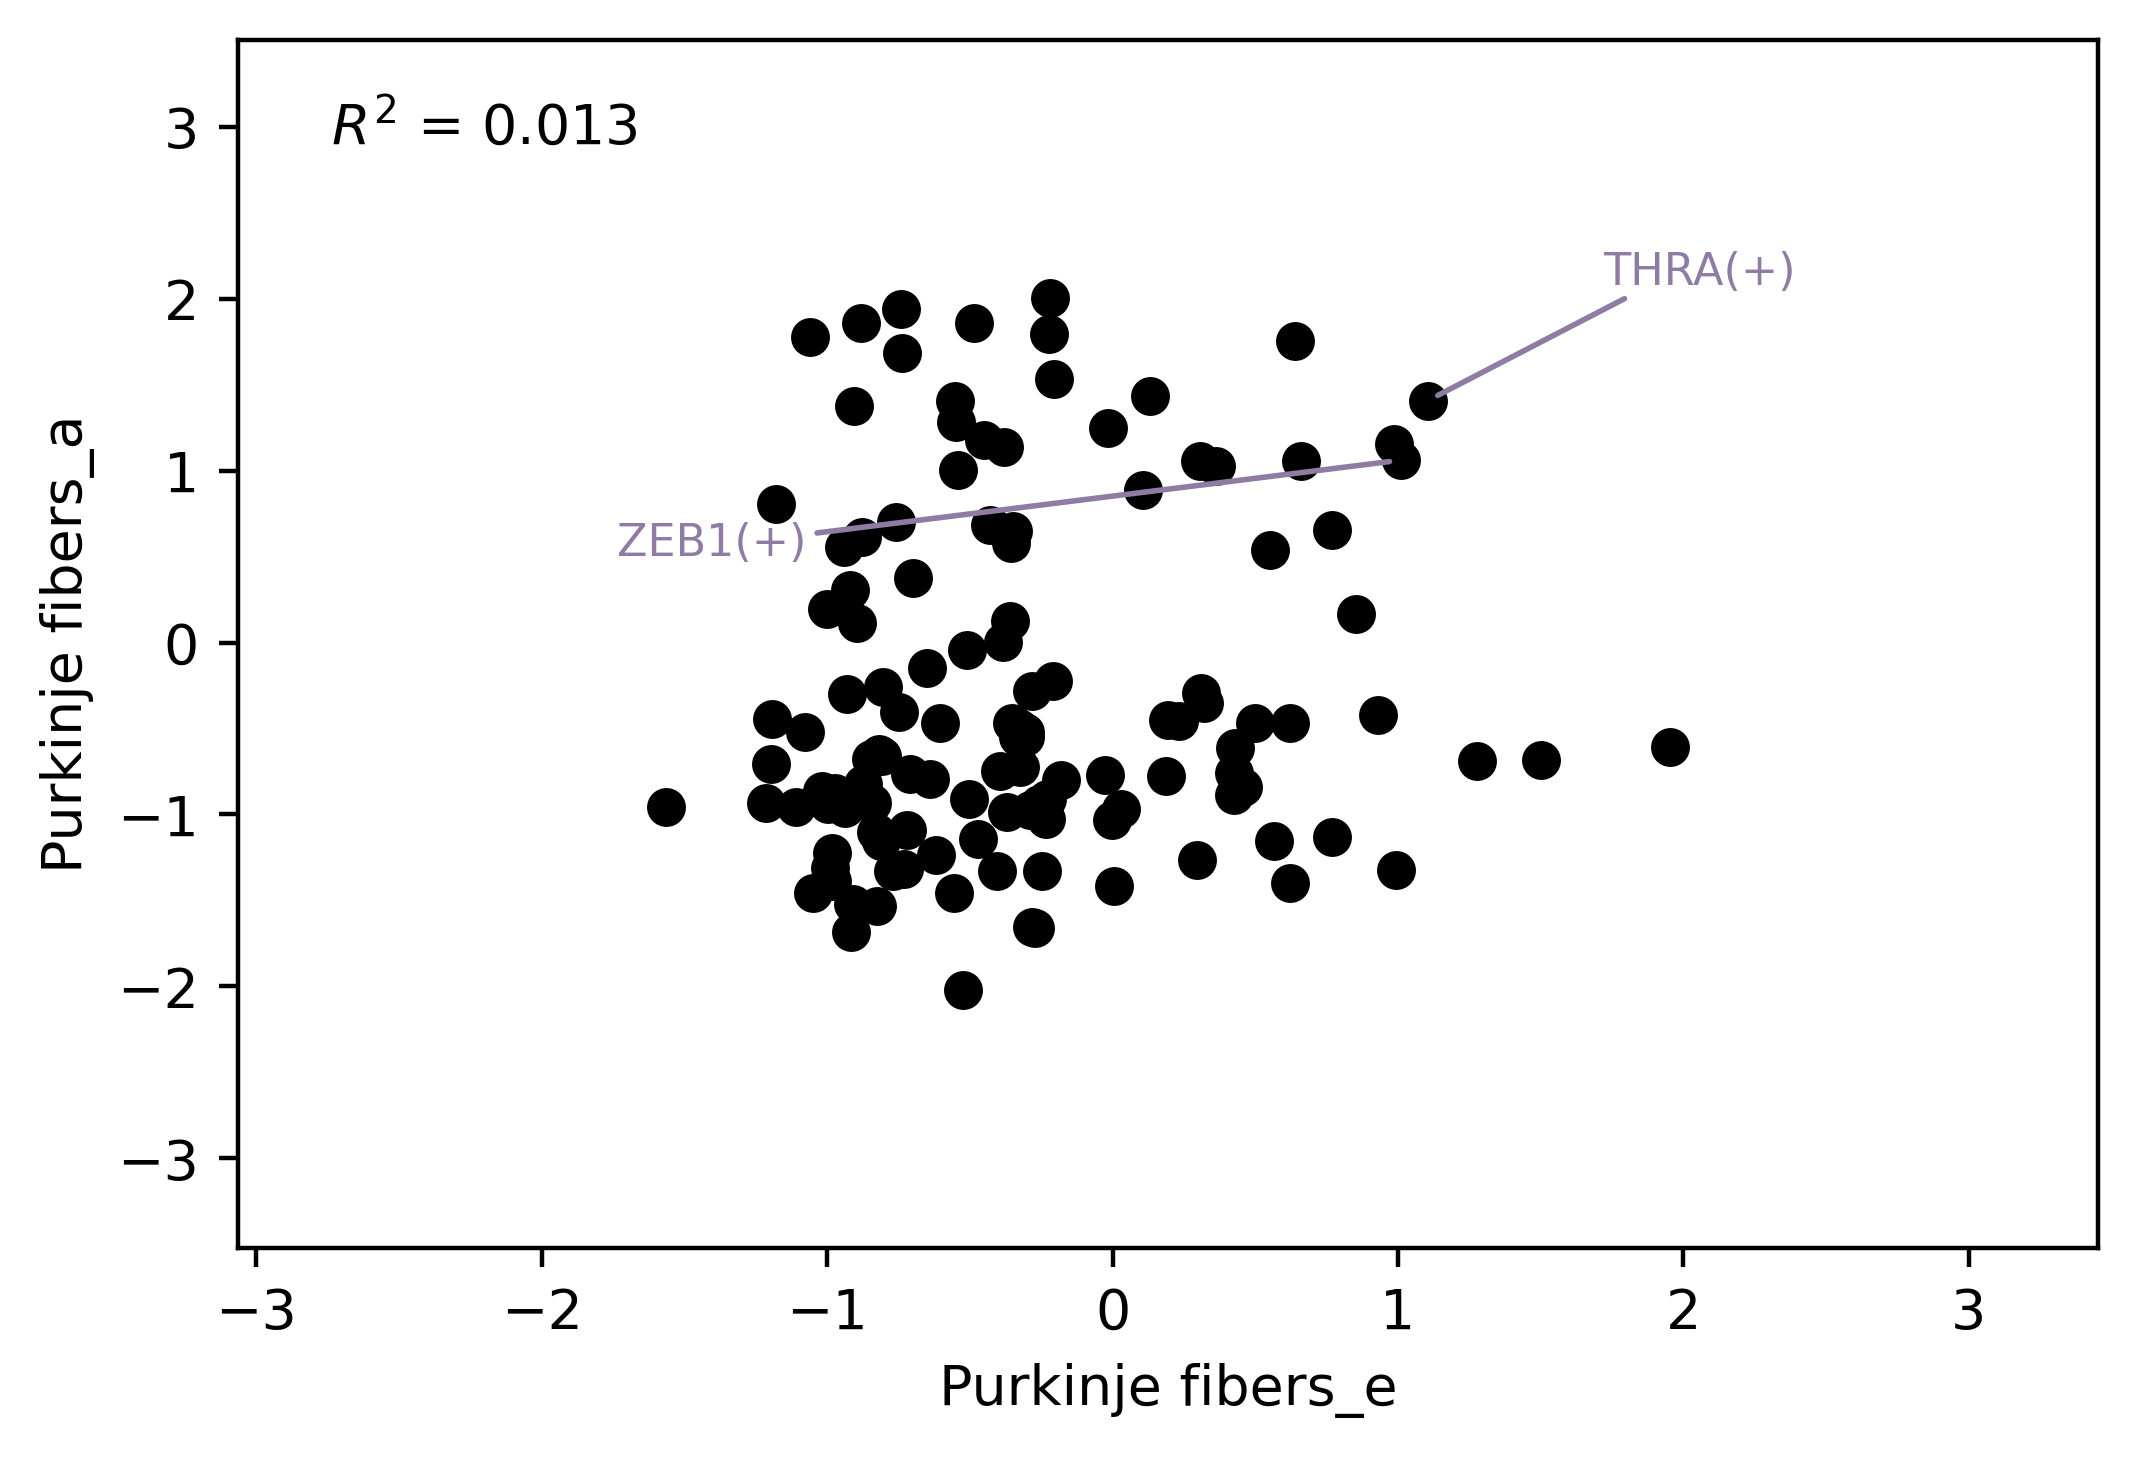

In [15]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from adjustText import adjust_text

plt.figure(dpi=400)
plt.scatter(auc_combined.loc['Purkinje fibers_e'], auc_combined.loc['Purkinje fibers_a'], c='black')

x_values = pd.Series(auc_combined.loc['Purkinje fibers_e'])
y_values = pd.Series(auc_combined.loc['Purkinje fibers_a'])

# Fit a linear regression model to calculate R²
model = LinearRegression()
model.fit(x_values.values.reshape(-1, 1), y_values.values)
r_squared = r2_score(y_values, model.predict(x_values.values.reshape(-1, 1)))

# Create a list to store the text annotations
texts = []

# Label points above a threshold on both axes
for i, row in pd.concat([x_values, y_values], axis=1).iterrows():
    x = row['Purkinje fibers_e']
    y = row['Purkinje fibers_a']
    
    if x > 1 and y > 1:
        texts.append(plt.text(x, y, i, fontsize=8, color='#8F7BA3'))

# Adjust text to avoid overlap
adjust_text(
    texts,
    expand_text=(10, 10),
    arrowprops=dict(arrowstyle='-', color='#8F7BA3', lw=1)
)

plt.xlim([min(x_values) - 1.5, max(x_values) + 1.5]) 
plt.ylim([min(y_values) - 1.5, max(y_values) + 1.5]) 
plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.3f}', transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top', color='black')
plt.xlabel('Purkinje fibers_e')
plt.ylabel('Purkinje fibers_a')
plt.show()

In [5]:
from math import sqrt

import numpy as np
from scipy.spatial.distance import jensenshannon


def regulon_specificity_scores(auc_mtx, cell_type_series):
    """
    Calculates the Regulon Specificty Scores (RSS). [doi: 10.1016/j.celrep.2018.10.045]

    :param auc_mtx: The dataframe with the AUC values for all cells and regulons (n_cells x n_regulons).
    :param cell_type_series: A pandas Series object with cell identifiers as index and cell type labels as values.
    :return: A pandas dataframe with the RSS values (cell type x regulon).
    """

    cell_types = list(cell_type_series.unique())
    n_types = len(cell_types)
    regulons = list(auc_mtx.columns)
    n_regulons = len(regulons)
    rss_values = np.empty(shape=(n_types, n_regulons), dtype=np.float32)

    def rss(aucs, labels):
        # jensenshannon function provides distance which is the sqrt of the JS divergence.
        return 1.0 - jensenshannon(aucs / aucs.sum(), labels / labels.sum())

    for cidx, regulon_name in enumerate(regulons):
        for ridx, cell_type in enumerate(cell_types):
            rss_values[ridx, cidx] = rss(
                auc_mtx[regulon_name], (cell_type_series == cell_type).astype(int)
            )

    return pd.DataFrame(data=rss_values, index=cell_types, columns=regulons)

In [6]:
meta_hse = pd.read_csv("/Users/marwanbakr/docs/kimlab/scRNA-seq/human_heart/human_heart_developing/fcm_scenic_meta.csv", index_col=0)
meta_hsa = pd.read_csv("/Users/marwanbakr/docs/kimlab/scRNA-seq/human_heart/kcm_sub_meta.csv", index_col=0)

e_regs = pd.read_csv('/Users/marwanbakr/docs/kimlab/scRNA-seq/human_heart/human_heart_developing/regulons_activating_list_embryo.csv')
e_regs = e_regs['x'].tolist()
e_regs = [col + '(+)' for col in e_regs]

a_regs = pd.read_csv('/Users/marwanbakr/docs/kimlab/scRNA-seq/human_heart/regulons_activating_list_adult.csv')
a_regs = a_regs['x'].tolist()
a_regs = [col + '(+)' for col in a_regs]

In [7]:
loom = lp.connect("/Users/marwanbakr/docs/kimlab/scRNA-seq/human_heart/human_heart_developing/human_ivs_ra_ccs_raw_reg_mingenes5_20241003_activatingonly_aucell.loom", mode='r+', validate=False)
auc_mtx_hsea = pd.DataFrame(loom.ca.RegulonsAUC, index=loom.ca.CellID)
rss_hse = regulon_specificity_scores(auc_mtx_hsea, meta_hse["sub_ccs_onesan"])
rss_hse = rss_hse[e_regs]
rss_hse.columns = rss_hse.columns.str.replace(r'\s*\(\+\)', '', regex=True)
rss_hse

,ARID3A,ATF4,BCL11A,BCLAF1,BPTF,CEBPZ,CREB1,CREM,CUX1,DRAP1,...,THAP11,THRA,ZNF580,CREB5,DEAF1,NCOA1,ZEB1,ZNF431,IRX3,ETS2
aCM,0.261064,0.252762,0.235380,0.272946,0.252951,0.275826,0.264699,0.249557,0.269504,0.275118,...,0.216743,0.220321,0.264389,0.242851,0.248701,0.221879,0.259984,0.262527,0.220256,0.261276
SA node,0.304151,0.246771,0.236029,0.259982,0.257507,0.254243,0.259552,0.241597,0.265213,0.250399,...,0.228662,0.241826,0.259448,0.232308,0.266457,0.239432,0.222016,0.256764,0.199646,0.244584
Tz-SAN,0.227065,0.205648,0.196271,0.209132,0.207509,0.208392,0.208735,0.201762,0.212784,0.205889,...,0.194929,0.199614,0.210391,0.201048,0.212815,0.195837,0.190036,0.205967,0.187755,0.207584
Lower nodal bundle,0.200023,0.187974,0.176475,0.184305,0.182356,0.183421,0.182437,0.186616,0.186157,0.185639,...,0.178975,0.186647,0.189766,0.186361,0.185951,0.181476,0.176492,0.183145,0.176400,0.180637
Compact AVN,0.241633,0.220308,0.197214,0.215481,0.212125,0.213995,0.207658,0.216730,0.220073,0.219513,...,0.211429,0.213156,0.228395,0.210116,0.221319,0.200109,0.190856,0.213789,0.189334,0.201858
vCM,0.524813,0.654425,0.614380,0.633916,0.627563,0.636026,0.588455,0.666899,0.626101,0.637786,...,0.359006,0.595683,0.623307,0.686146,0.570535,0.446136,0.616504,0.633050,0.660967,0.610590
Purkinje fibers,0.212033,0.205754,0.210088,0.207936,0.206353,0.206997,0.203633,0.207602,0.206573,0.212290,...,0.199016,0.231481,0.214651,0.205502,0.213685,0.201957,0.212047,0.206021,0.244194,0.236722
His bundle,0.228851,0.224219,0.210069,0.220619,0.210391,0.219774,0.214097,0.225181,0.217612,0.226895,...,0.226648,0.252079,0.230905,0.217286,0.226849,0.193094,0.202365,0.217027,0.225045,0.217835


In [8]:
loom = lp.connect("/Users/marwanbakr/docs/kimlab/scRNA-seq/human_heart/san_avn_ax_cm_raw_reg_mingenes5_activatingonly_aucell.loom", mode='r+', validate=False)
auc_mtx_hsaa = pd.DataFrame(loom.ca.RegulonsAUC, index=loom.ca.CellID)
rss_hsa = regulon_specificity_scores(auc_mtx_hsaa, meta_hsa["sub_ccs"])
rss_hsa = rss_hsa[a_regs]
rss_hsa.columns = rss_hsa.columns.str.replace(r'\s*\(\+\)', '', regex=True)
rss_hsa

,BACH1,BCL6,BCLAF1,BPTF,CBFB,CHD2,CHURC1,CLOCK,CREB3L2,CTCF,...,GABPB1,JUNB,KLF6,ZBTB7C,ZNF100,ZNF587,SATB1,ZNF423,ATF3,FOS
Purkinje fibers,0.189583,0.190858,0.188344,0.188792,0.191110,0.189925,0.184596,0.188441,0.181681,0.189840,...,0.188804,0.194572,0.196234,0.189695,0.178390,0.187015,0.173263,0.189043,0.212889,0.192888
vCM,0.645079,0.674928,0.691159,0.706689,0.683175,0.675615,0.489338,0.713421,0.360283,0.677811,...,0.695221,0.697774,0.710252,0.666682,0.321614,0.331733,0.215916,0.636847,0.610091,0.728794
SA node,0.197042,0.214631,0.213966,0.212366,0.214845,0.218039,0.258406,0.210352,0.215068,0.200294,...,0.209766,0.209294,0.204830,0.220212,0.184559,0.217511,0.208851,0.235115,0.200701,0.204719
aCM,0.282909,0.328511,0.324595,0.316181,0.321872,0.332049,0.446446,0.309251,0.352340,0.286933,...,0.313018,0.308156,0.298812,0.335960,0.230849,0.301732,0.257575,0.334320,0.291446,0.290977
His bundle,0.179066,0.178701,0.177723,0.176871,0.178185,0.178945,0.184220,0.177069,0.179296,0.174052,...,0.176647,0.177735,0.176455,0.180013,0.174044,0.174797,0.183099,0.187430,0.176329,0.175713
Compact AV node,0.197200,0.206382,0.202271,0.198129,0.207522,0.207050,0.230010,0.196601,0.216792,0.192464,...,0.201017,0.207578,0.202814,0.212423,0.181784,0.195053,0.213404,0.213192,0.199628,0.195733


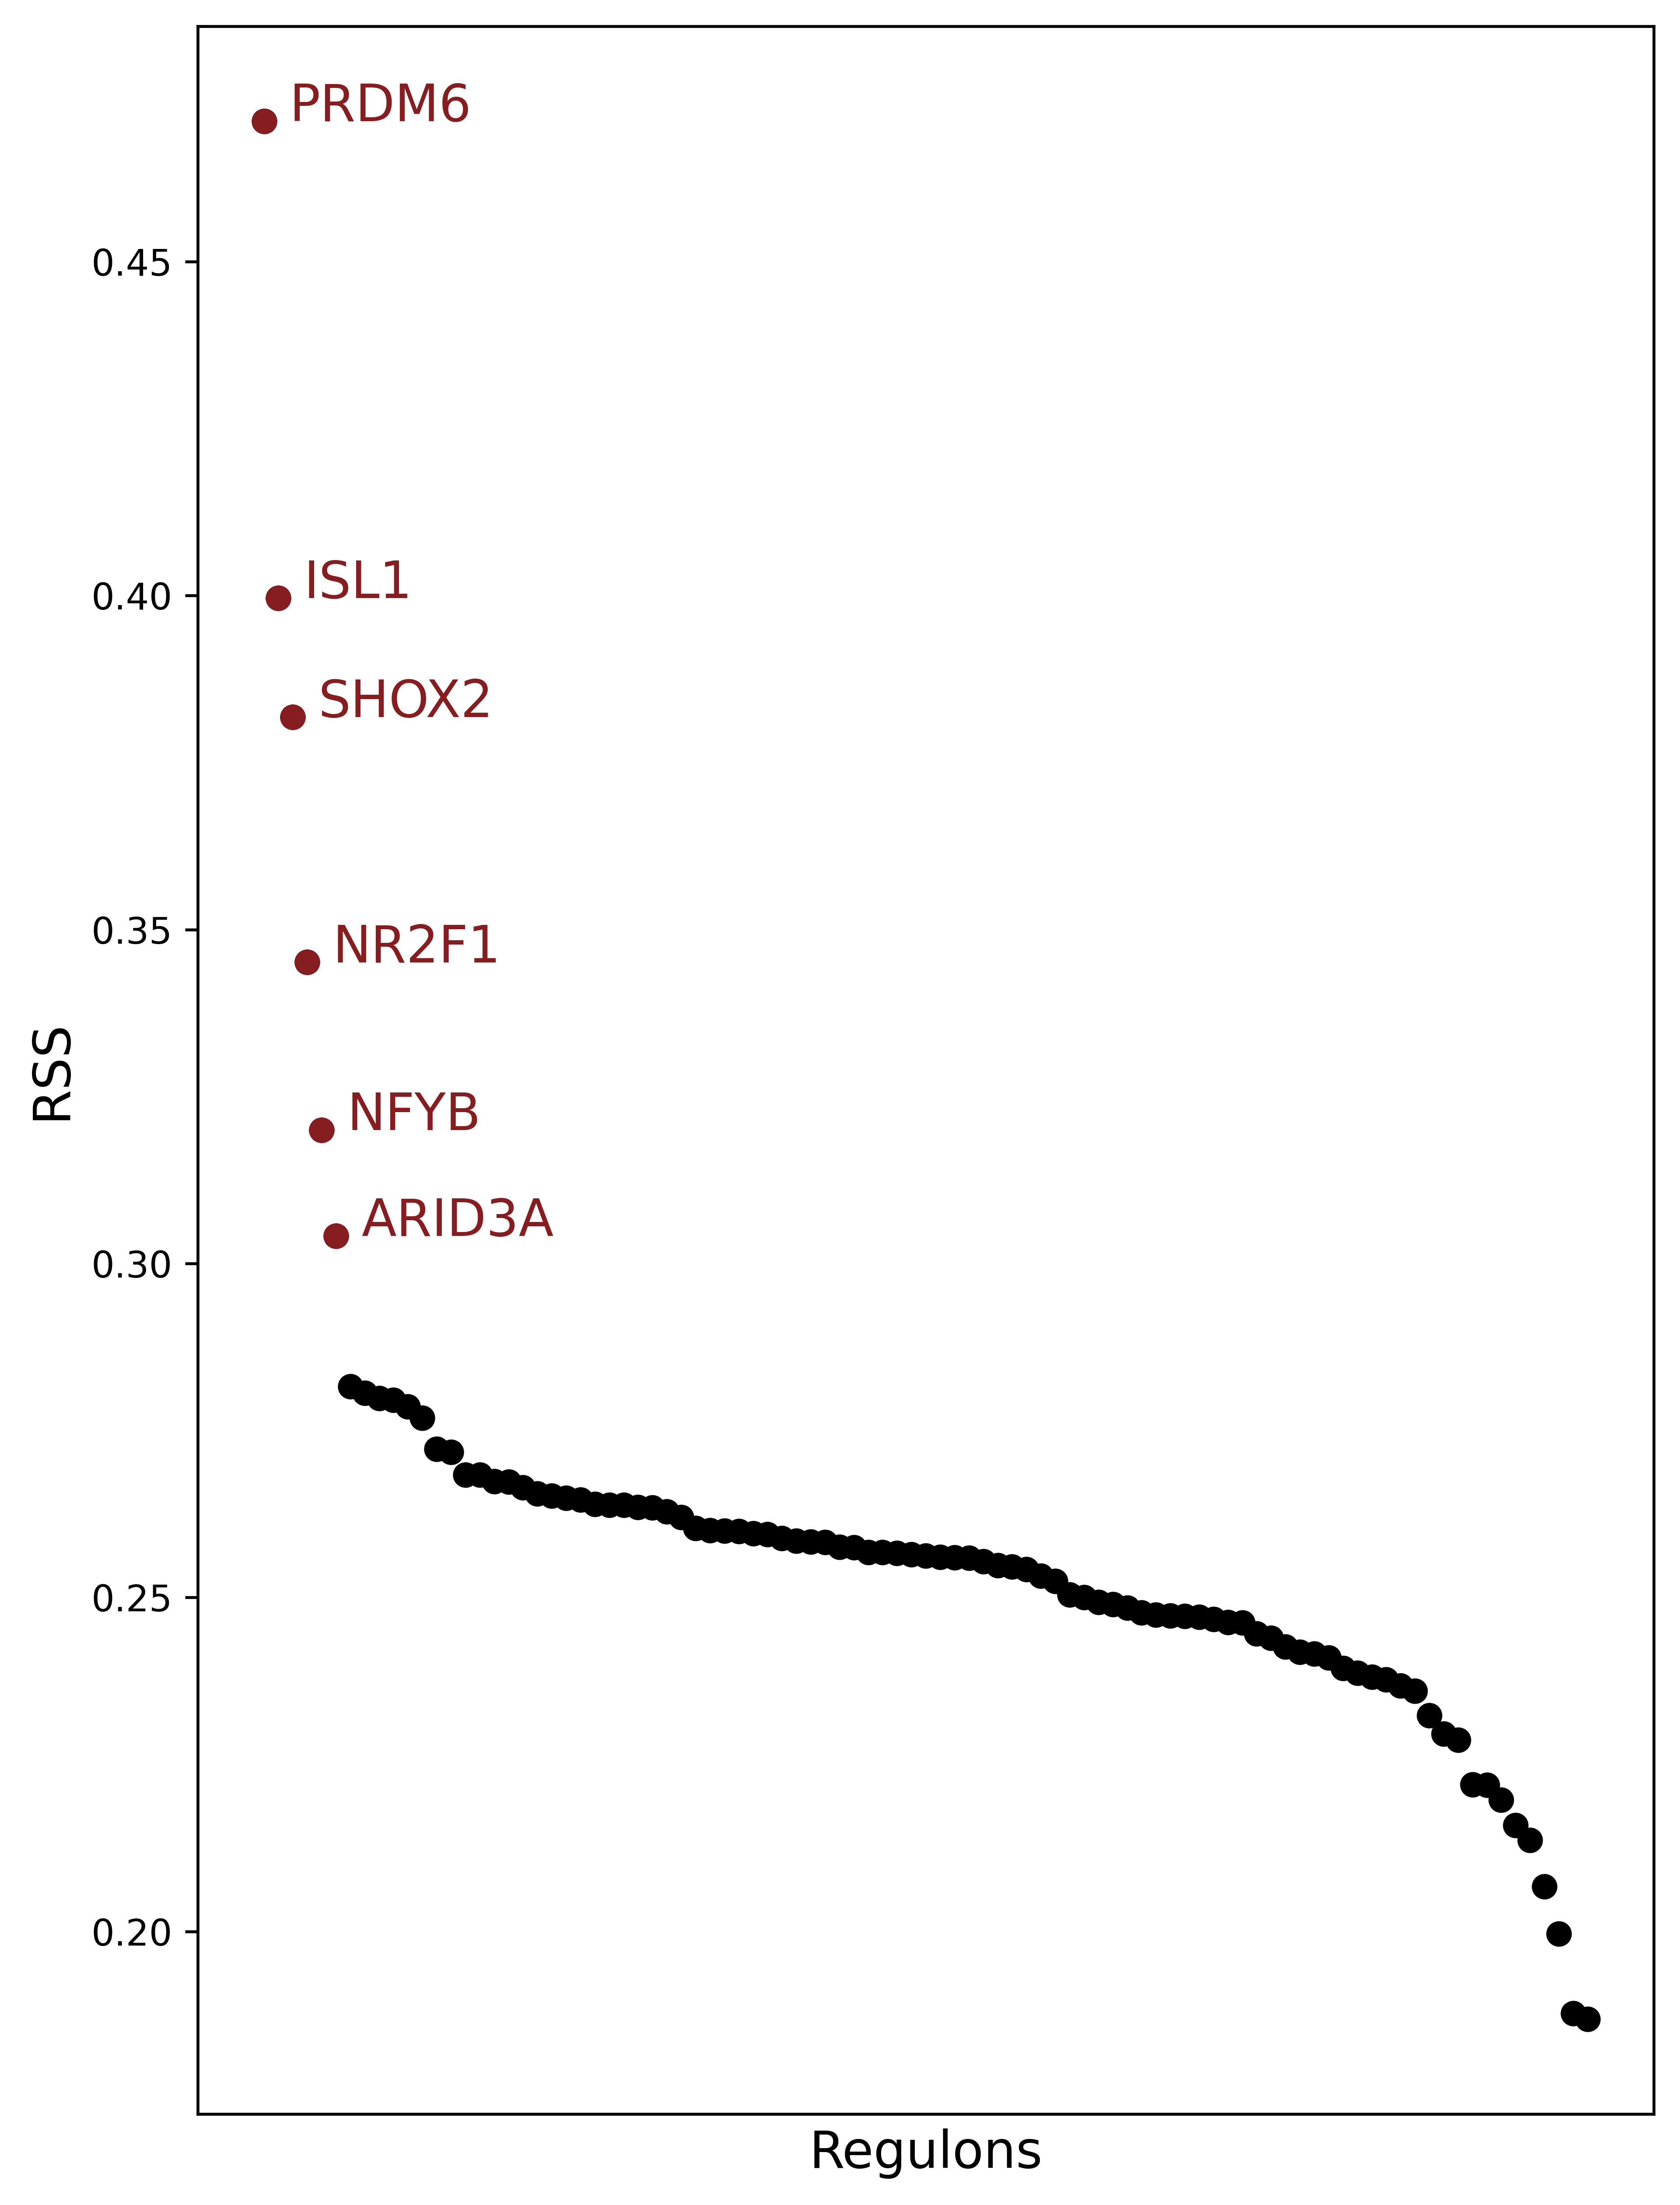

In [10]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

vals = rss_hse[rss_hse.index == 'SA node'].T

# sorting values in decreasing order
vals = vals.sort_values(by='SA node', ascending=False)

# plotting
plt.figure(figsize=(6.5, 8.5), dpi=600)
plt.scatter(vals.index, vals['SA node'], color='black')
plt.xticks([])
plt.ylabel('RSS', fontsize=14)
plt.xlabel('Regulons', fontsize=14)

# labeling the top points
top = vals.head(6)
plt.scatter(top.index, top['SA node'], color='#861d21')
for i, value in enumerate(top['SA node']):
    plt.annotate(top.index[i], (top.index[i], value), 
                 textcoords="offset points", 
                 xytext=(7, 0), 
                 ha='left',
                 color='#861d21',
                 fontsize=14)

plt.tight_layout()
plt.savefig('/Users/marwanbakr/docs/kimlab/manuscripts/2024 CCS comparative/figures/fig4/embryo_rss_san.tiff', format='tiff', dpi=600, bbox_inches='tight')
plt.show()

In [14]:
vals.head(20)

,SA node
PRDM6,0.471013
ISL1,0.399636
SHOX2,0.381815
NR2F1,0.345088
NFYB,0.319964
ARID3A,0.304151
JUNB,0.281604
GATAD1,0.280600
HMGA2,0.279828
SMAD9,0.279573


/Users/marwanbakr/anaconda3/lib/python3.10/site-packages/matplotlib/transforms.py:614: RuntimeWarning: invalid value encountered in scalar subtract
  deltaw = (sw * width - width) / 2.0
/Users/marwanbakr/anaconda3/lib/python3.10/site-packages/matplotlib/transforms.py:615: RuntimeWarning: invalid value encountered in scalar subtract
  deltah = (sh * height - height) / 2.0


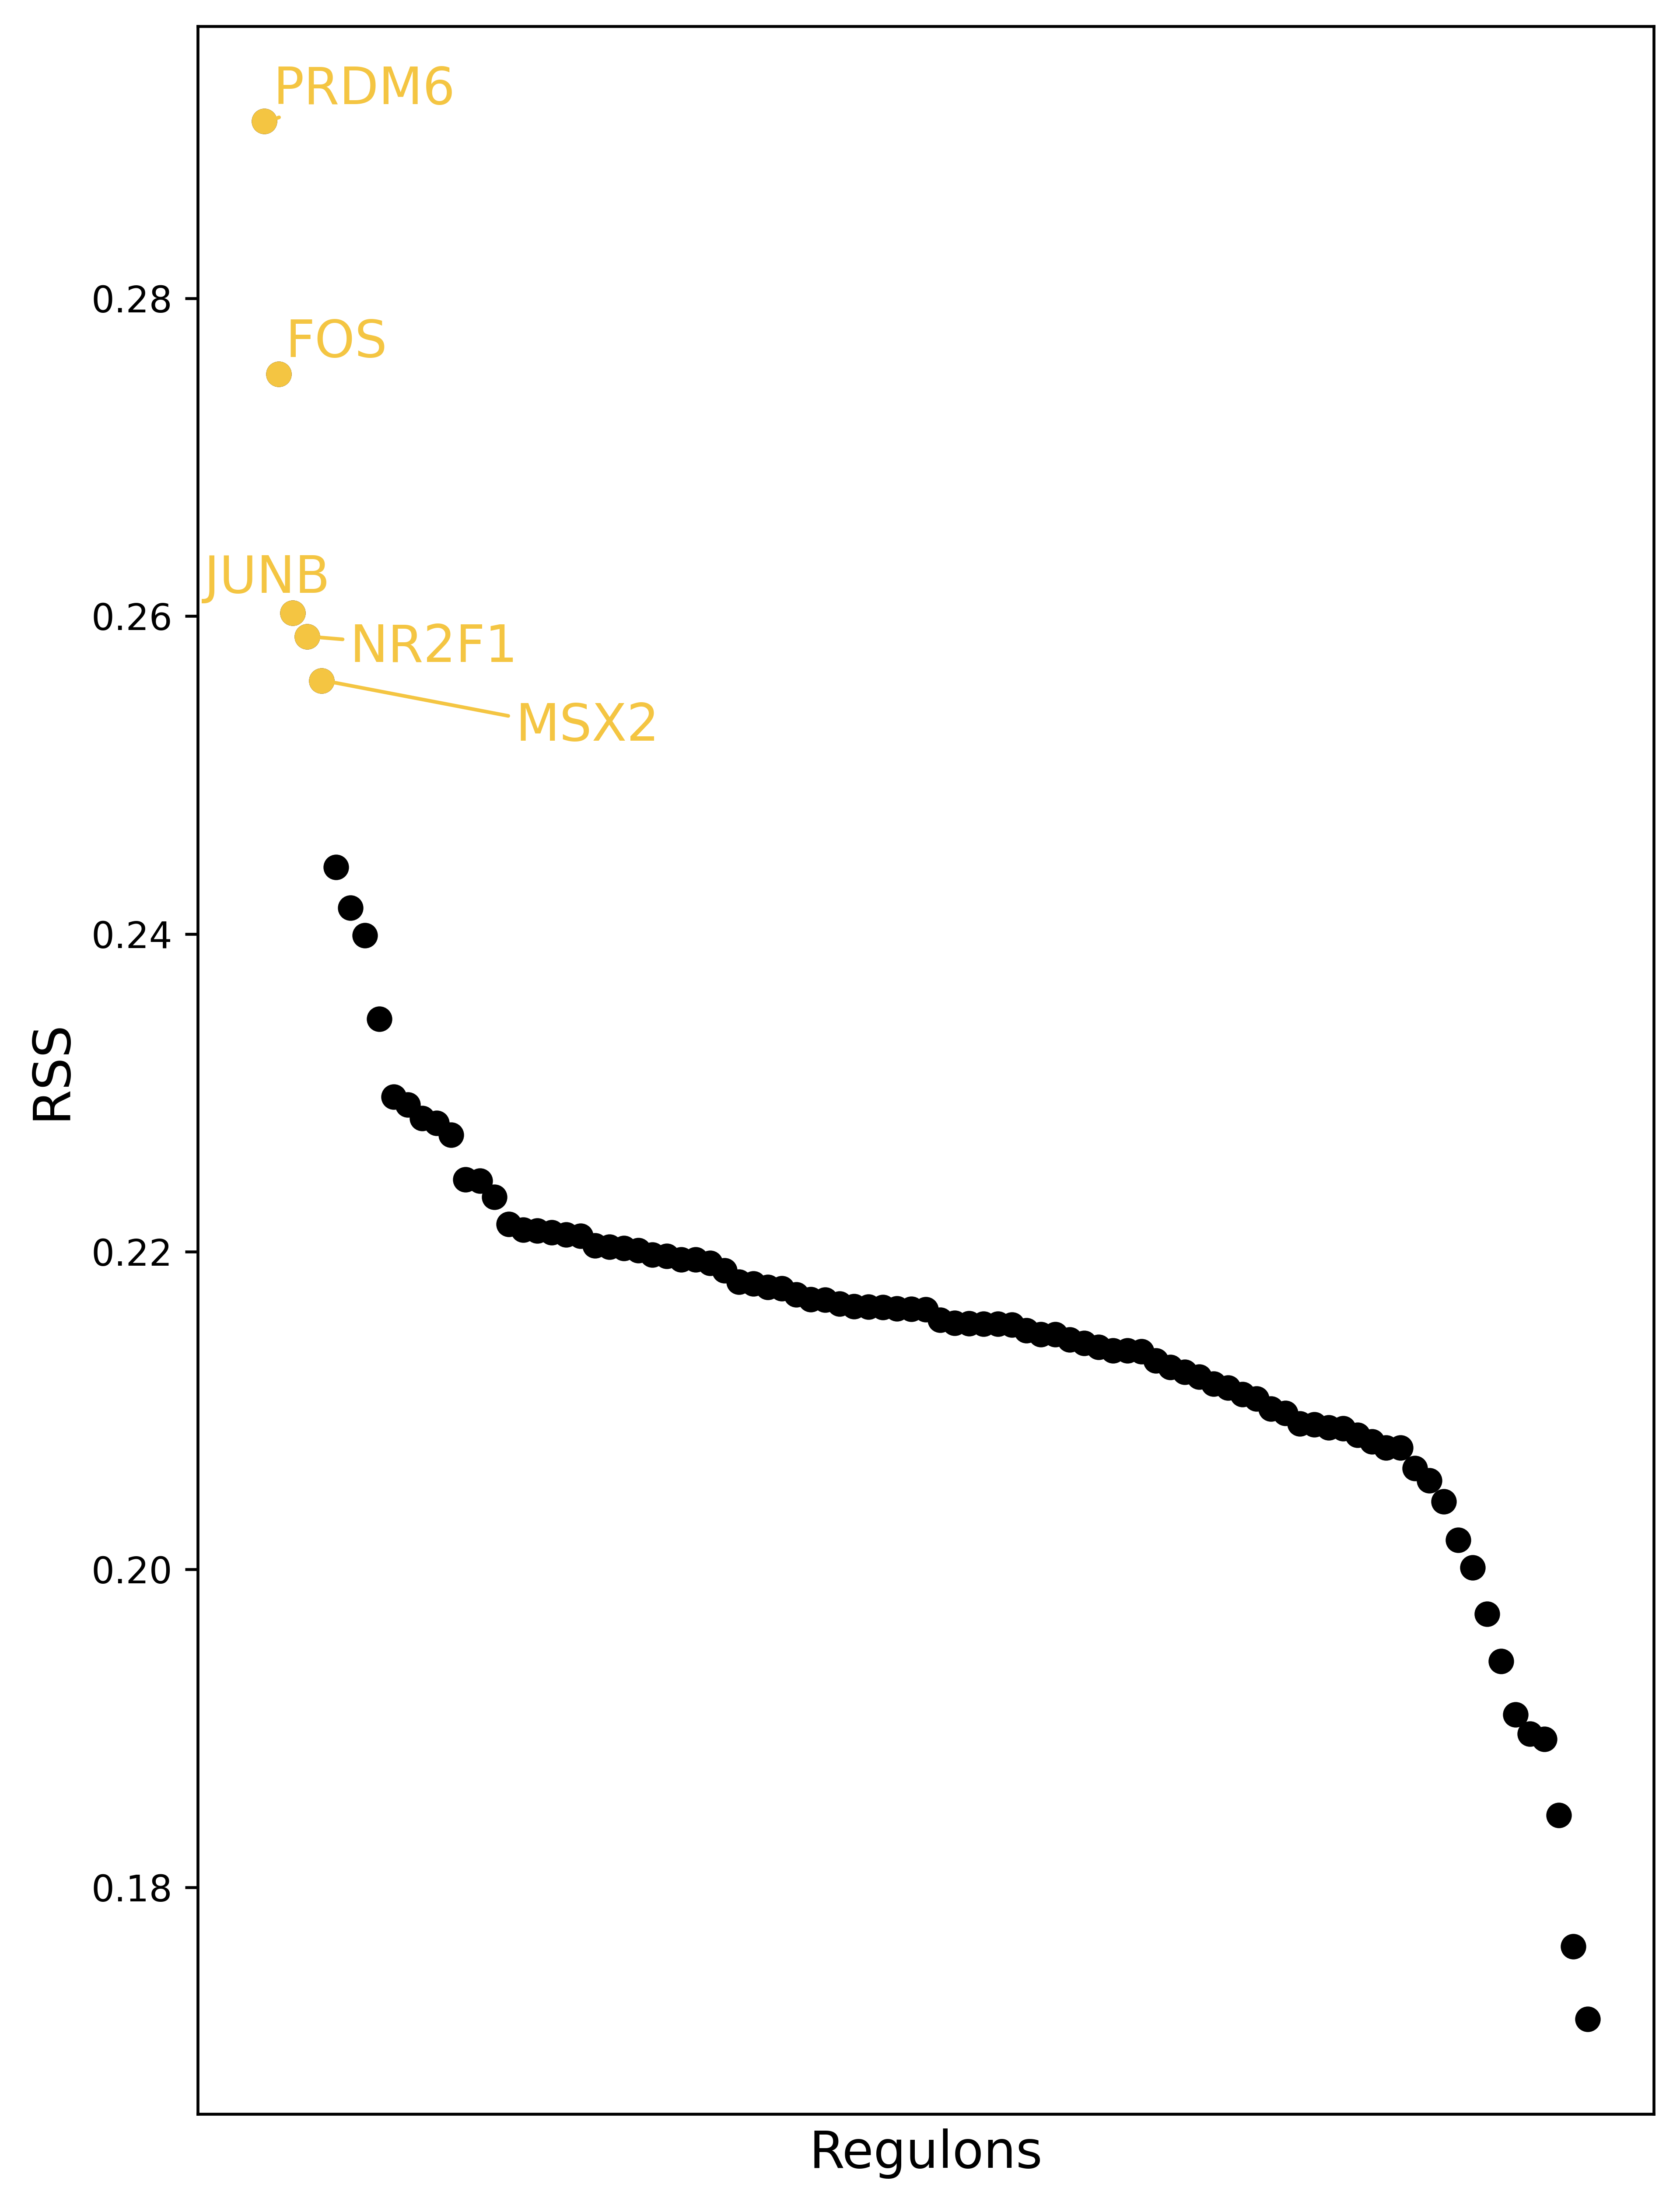

In [117]:
vals = rss_hse[rss_hse.index == 'Compact AVN'].T
vals = vals.sort_values(by='Compact AVN', ascending=False)
vals = vals.reset_index()
vals['x'] = vals.index

plt.figure(figsize=(6.5, 8.5), dpi=600)
plt.scatter(vals['x'], vals['Compact AVN'], color='black')
plt.xticks([])
plt.ylabel('RSS', fontsize=14)
plt.xlabel('Regulons', fontsize=14)

top = vals.head(5)
plt.scatter(top['x'], top['Compact AVN'], color='#F4C542')

texts = []
offset = 0.3  # small offset to the right
for i, row in top.iterrows():
    txt = plt.annotate(
        row['index'],
        xy=(row['x'], row['Compact AVN']),
        xytext=(row['x'] + offset, row['Compact AVN']),
        textcoords='data',
        ha='left',
        va='center',
        color='#F4C542',
        fontsize=14
    )
    texts.append(txt)

adjust_text(
    texts,
    add_objects=[plt.scatter(vals['x'], vals['Compact AVN'], s=0)],  # include points to avoid overlaps
    force_text=0.2,  
    force_points=0.1, 
    expand_text=(1.1, 1.2), 
    lim=1000, 
    arrowprops=dict(arrowstyle='-', color='#F4C542'),
)

plt.tight_layout()
plt.savefig(
    '/Users/marwanbakr/docs/kimlab/manuscripts/2024 CCS comparative/figures/fig4/embryo_rss_avn.tiff',
    format='tiff',
    dpi=600,
    bbox_inches='tight'
)
plt.show()

In [124]:
vals.head(20)

,Compact AVN
PRDM6,0.291159
FOS,0.275227
JUNB,0.260203
NR2F1,0.258705
MSX2,0.255923
NFYB,0.244220
ARID3A,0.241633
JUN,0.239920
SMAD9,0.234665
PURA,0.229749


/Users/marwanbakr/anaconda3/lib/python3.10/site-packages/matplotlib/transforms.py:614: RuntimeWarning: invalid value encountered in scalar subtract
  deltaw = (sw * width - width) / 2.0
/Users/marwanbakr/anaconda3/lib/python3.10/site-packages/matplotlib/transforms.py:615: RuntimeWarning: invalid value encountered in scalar subtract
  deltah = (sh * height - height) / 2.0


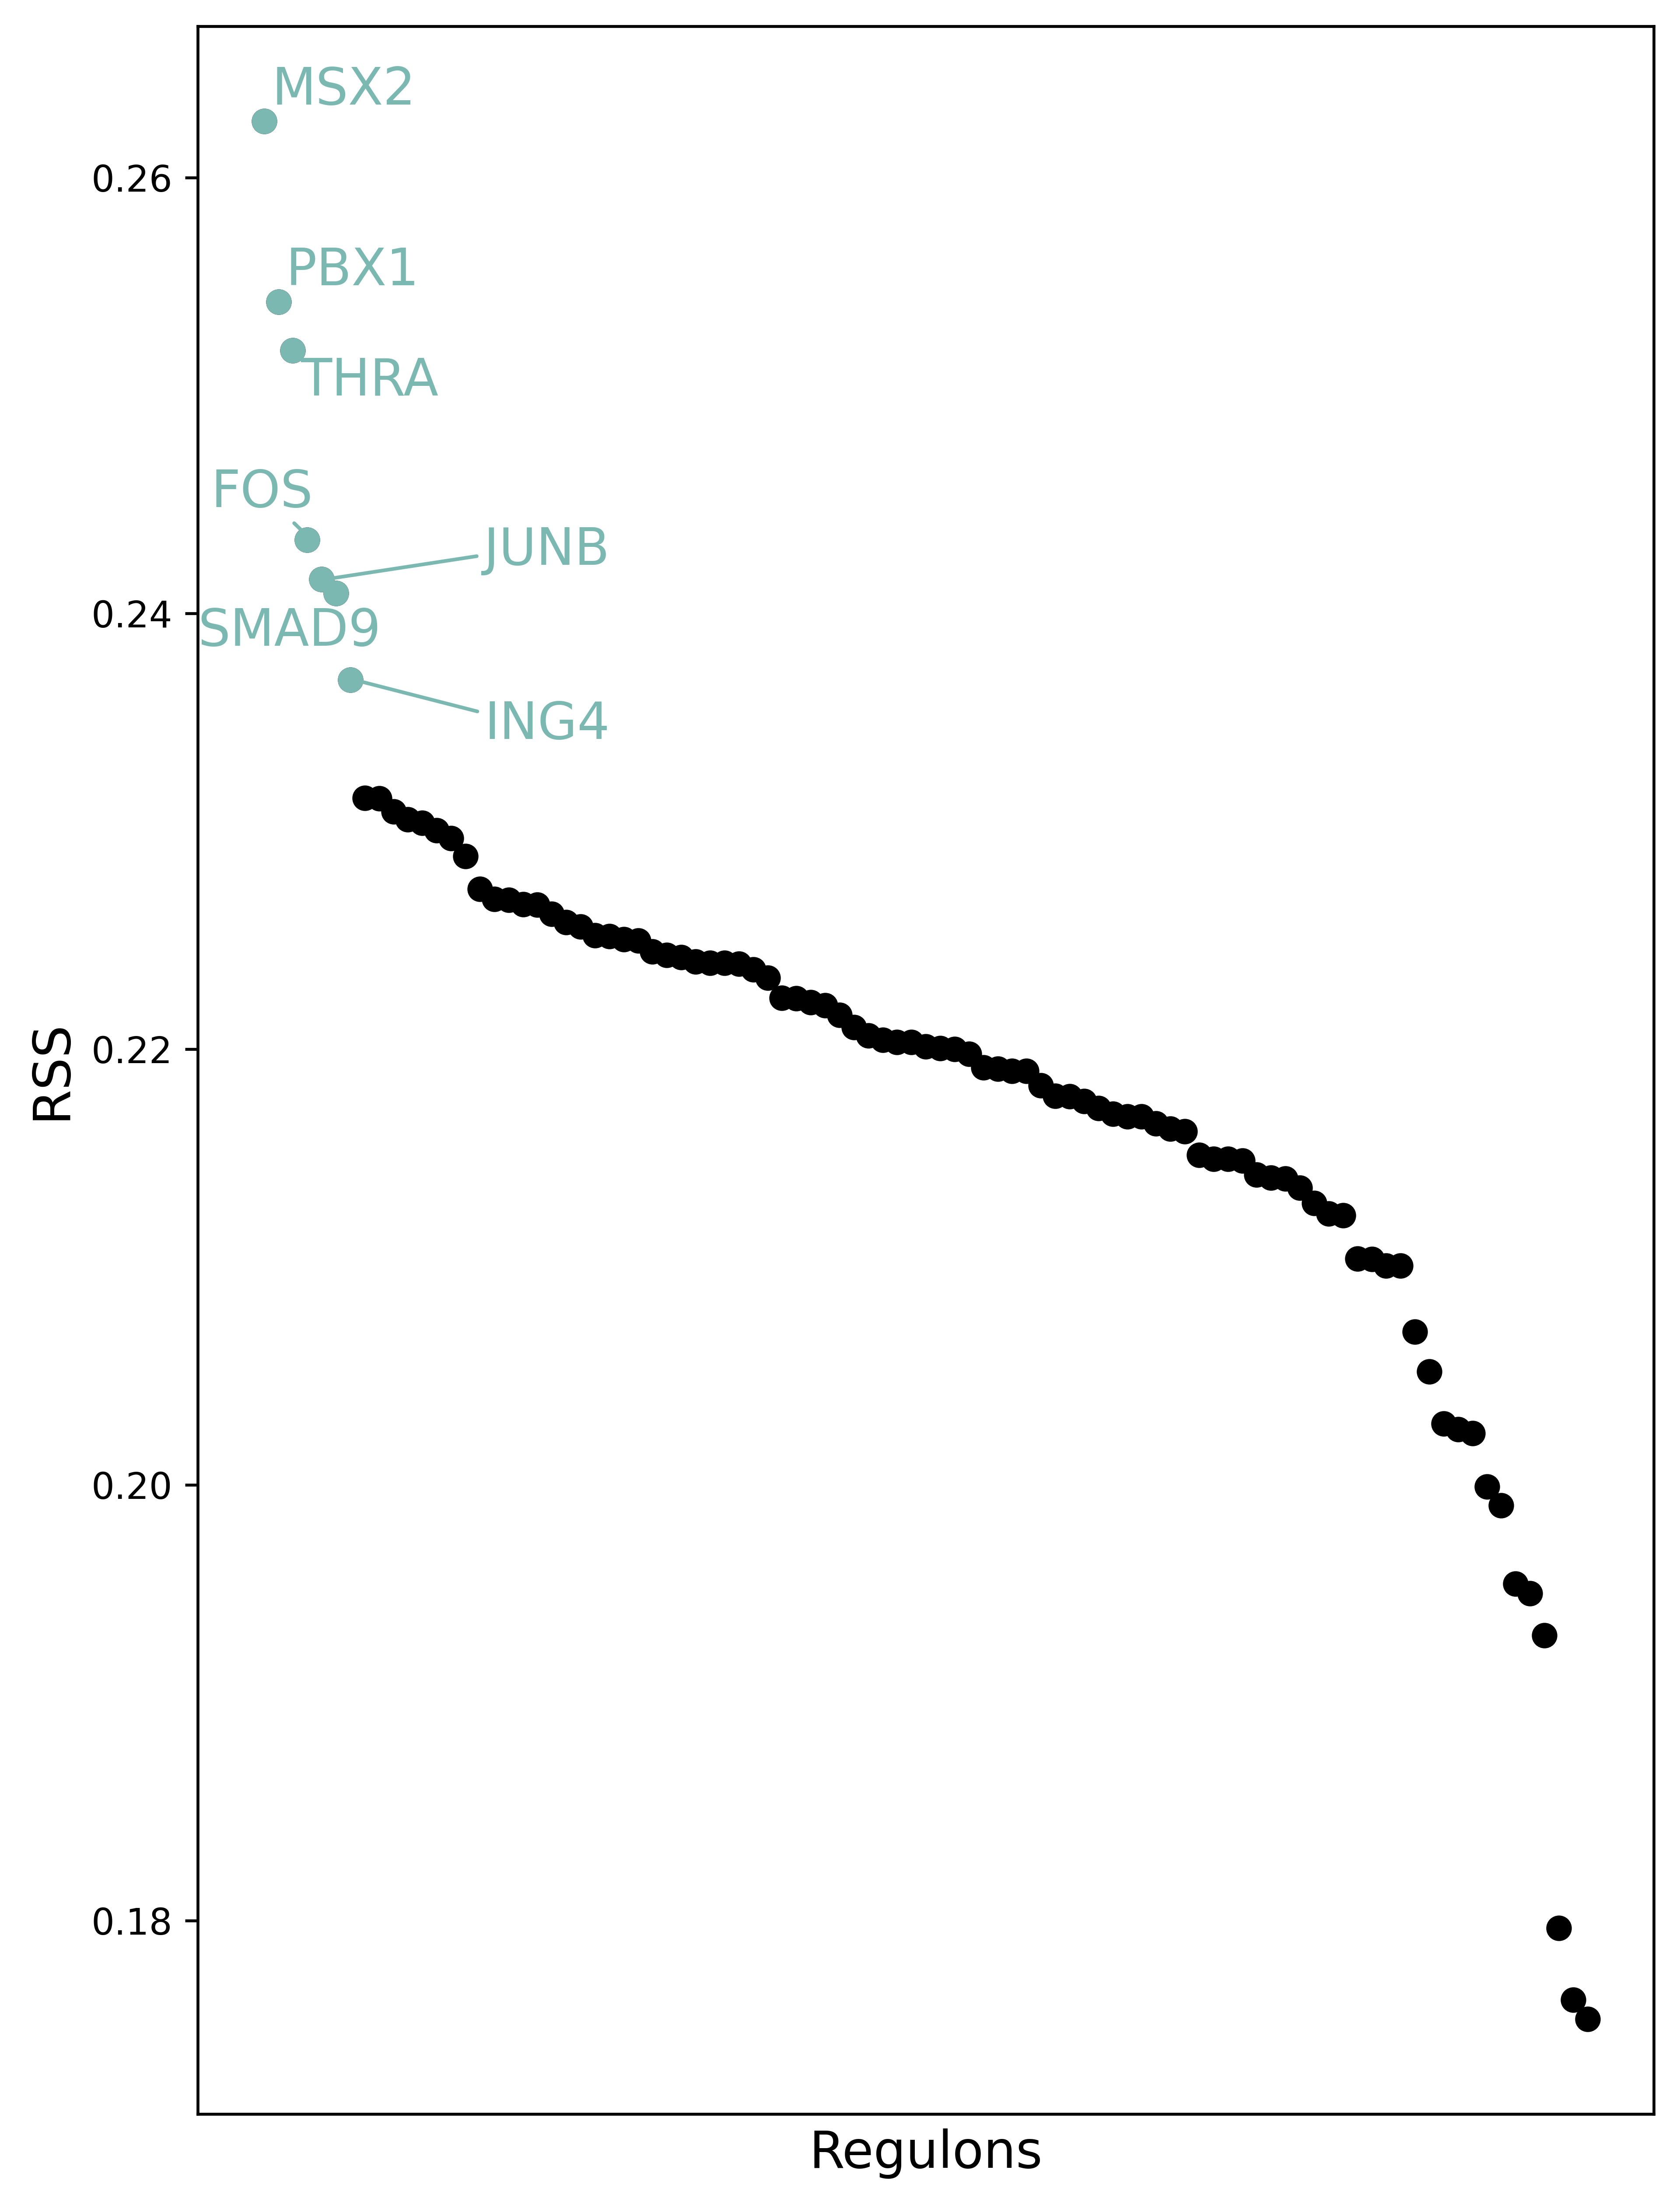

In [118]:
vals = rss_hse[rss_hse.index == 'His bundle'].T
vals = vals.sort_values(by='His bundle', ascending=False)
vals = vals.reset_index()
vals['x'] = vals.index

plt.figure(figsize=(6.5, 8.5), dpi=600)
plt.scatter(vals['x'], vals['His bundle'], color='black')
plt.xticks([])
plt.ylabel('RSS', fontsize=14)
plt.xlabel('Regulons', fontsize=14)

top = vals.head(7)
plt.scatter(top['x'], top['His bundle'], color='#7CB8B2')

texts = []
offset = 0.3  # small offset to the right
for i, row in top.iterrows():
    txt = plt.annotate(
        row['index'],
        xy=(row['x'], row['His bundle']),
        xytext=(row['x'] + offset, row['His bundle']),
        textcoords='data',
        ha='left',
        va='center',
        color='#7CB8B2',
        fontsize=14
    )
    texts.append(txt)

adjust_text(
    texts,
    add_objects=[plt.scatter(vals['x'], vals['His bundle'], s=0)],  # include points to avoid overlaps
    force_text=0.2,  
    force_points=0.1, 
    expand_text=(1.5, 1.5), 
    lim=1000, 
    arrowprops=dict(arrowstyle='-', color='#7CB8B2'),
)

plt.tight_layout()
plt.savefig(
    '/Users/marwanbakr/docs/kimlab/manuscripts/2024 CCS comparative/figures/fig4/embryo_rss_his.tiff',
    format='tiff',
    dpi=600,
    bbox_inches='tight'
)
plt.show()

In [127]:
vals.head(20)

,His bundle
MSX2,0.262594
PBX1,0.254296
THRA,0.252079
FOS,0.243366
JUNB,0.241571
SMAD9,0.240934
ING4,0.236947
PURA,0.231532
JUN,0.231511
ZNF580,0.230905


/Users/marwanbakr/anaconda3/lib/python3.10/site-packages/matplotlib/transforms.py:614: RuntimeWarning: invalid value encountered in scalar subtract
  deltaw = (sw * width - width) / 2.0
/Users/marwanbakr/anaconda3/lib/python3.10/site-packages/matplotlib/transforms.py:615: RuntimeWarning: invalid value encountered in scalar subtract
  deltah = (sh * height - height) / 2.0


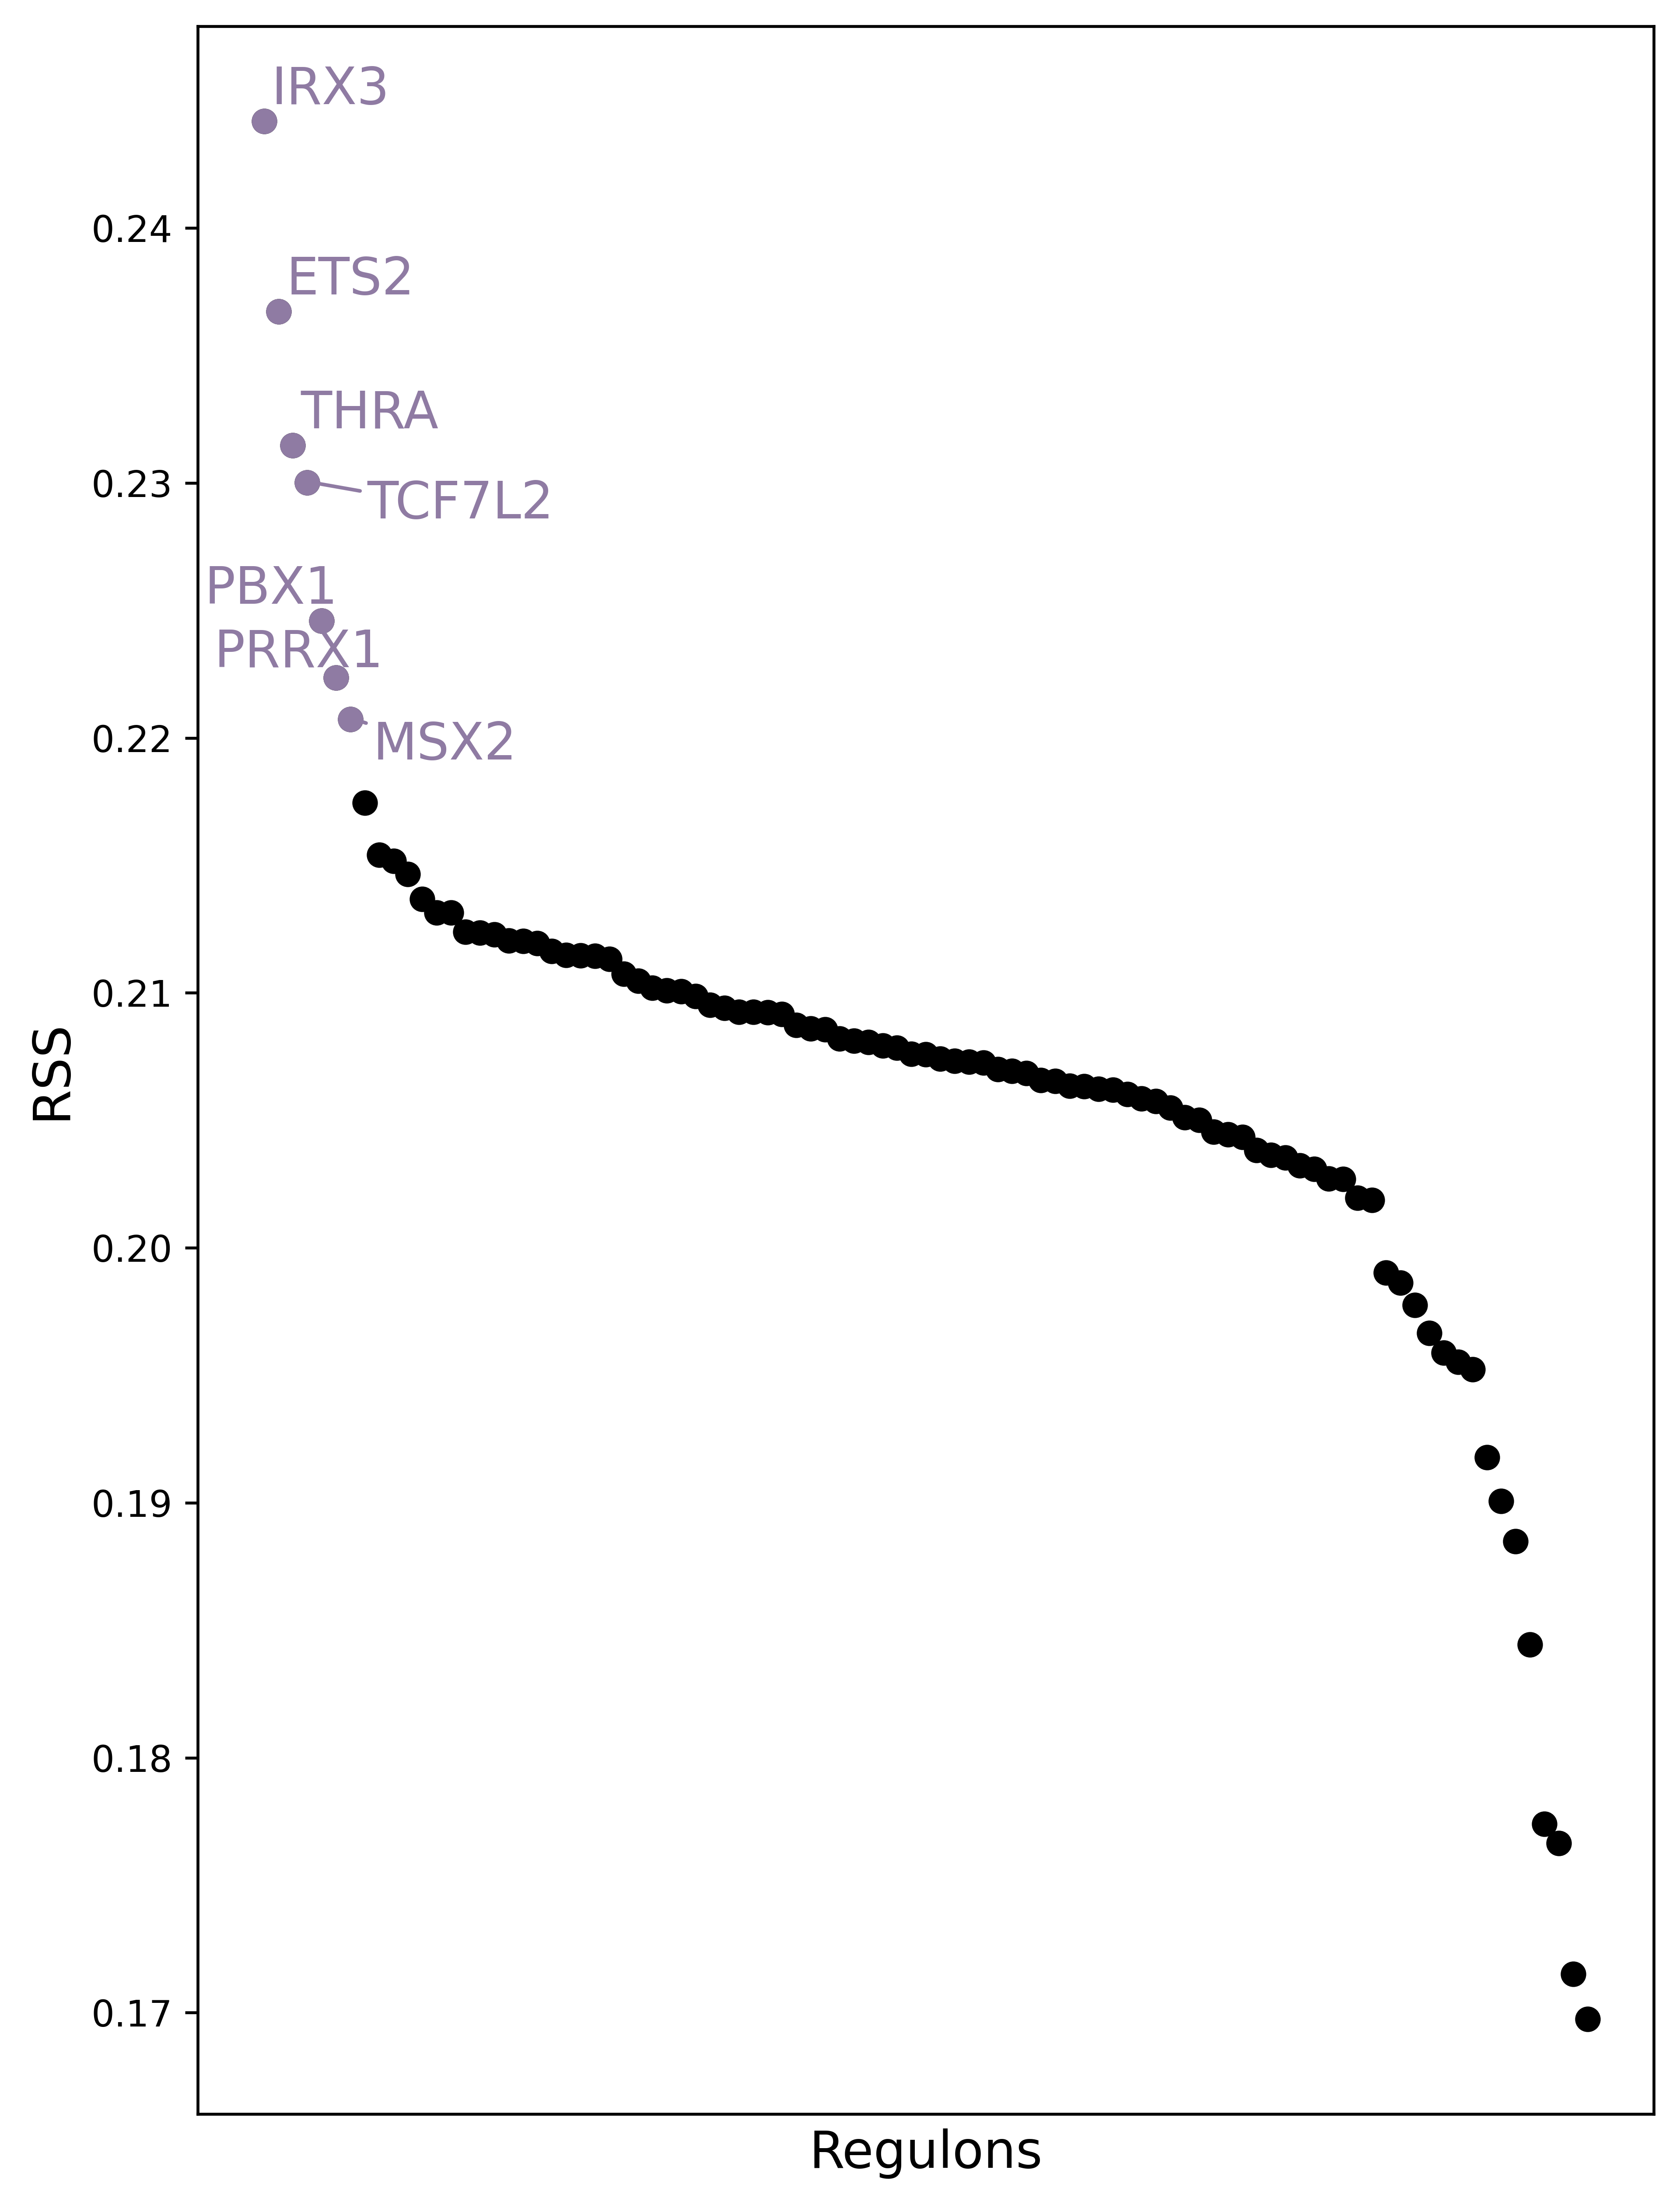

In [17]:
vals = rss_hse[rss_hse.index == 'Purkinje fibers'].T
vals = vals.sort_values(by='Purkinje fibers', ascending=False)
vals = vals.reset_index()
vals['x'] = vals.index

plt.figure(figsize=(6.5, 8.5), dpi=600)
plt.scatter(vals['x'], vals['Purkinje fibers'], color='black')
plt.xticks([])
plt.ylabel('RSS', fontsize=14)
plt.xlabel('Regulons', fontsize=14)

top = vals.head(7)
plt.scatter(top['x'], top['Purkinje fibers'], color='#8F7BA3')

texts = []
offset = 0.3  # small offset to the right
for i, row in top.iterrows():
    txt = plt.annotate(
        row['index'],
        xy=(row['x'], row['Purkinje fibers']),
        xytext=(row['x'] + offset, row['Purkinje fibers']),
        textcoords='data',
        ha='left',
        va='center',
        color='#8F7BA3',
        fontsize=14
    )
    texts.append(txt)

adjust_text(
    texts,
    add_objects=[plt.scatter(vals['x'], vals['Purkinje fibers'], s=0)],  # include points to avoid overlaps
    force_text=0.1,  
    force_points=0.1, 
    expand_text=(1.12, 1.2), 
    lim=1000, 
    arrowprops=dict(arrowstyle='-', color='#8F7BA3'),
)

plt.tight_layout()
plt.savefig(
    '/Users/marwanbakr/docs/kimlab/manuscripts/2024 CCS comparative/figures/fig4/embryo_rss_pf.tiff',
    format='tiff',
    dpi=600,
    bbox_inches='tight'
)
plt.show()

In [129]:
vals.head(20)

,Purkinje fibers
IRX3,0.244194
ETS2,0.236722
THRA,0.231481
TCF7L2,0.230024
PBX1,0.224601
PRRX1,0.222356
MSX2,0.220730
ING4,0.217458
SMAD9,0.215411
RFXANK,0.215165


/Users/marwanbakr/anaconda3/lib/python3.10/site-packages/matplotlib/transforms.py:614: RuntimeWarning: invalid value encountered in scalar subtract
  deltaw = (sw * width - width) / 2.0
/Users/marwanbakr/anaconda3/lib/python3.10/site-packages/matplotlib/transforms.py:615: RuntimeWarning: invalid value encountered in scalar subtract
  deltah = (sh * height - height) / 2.0


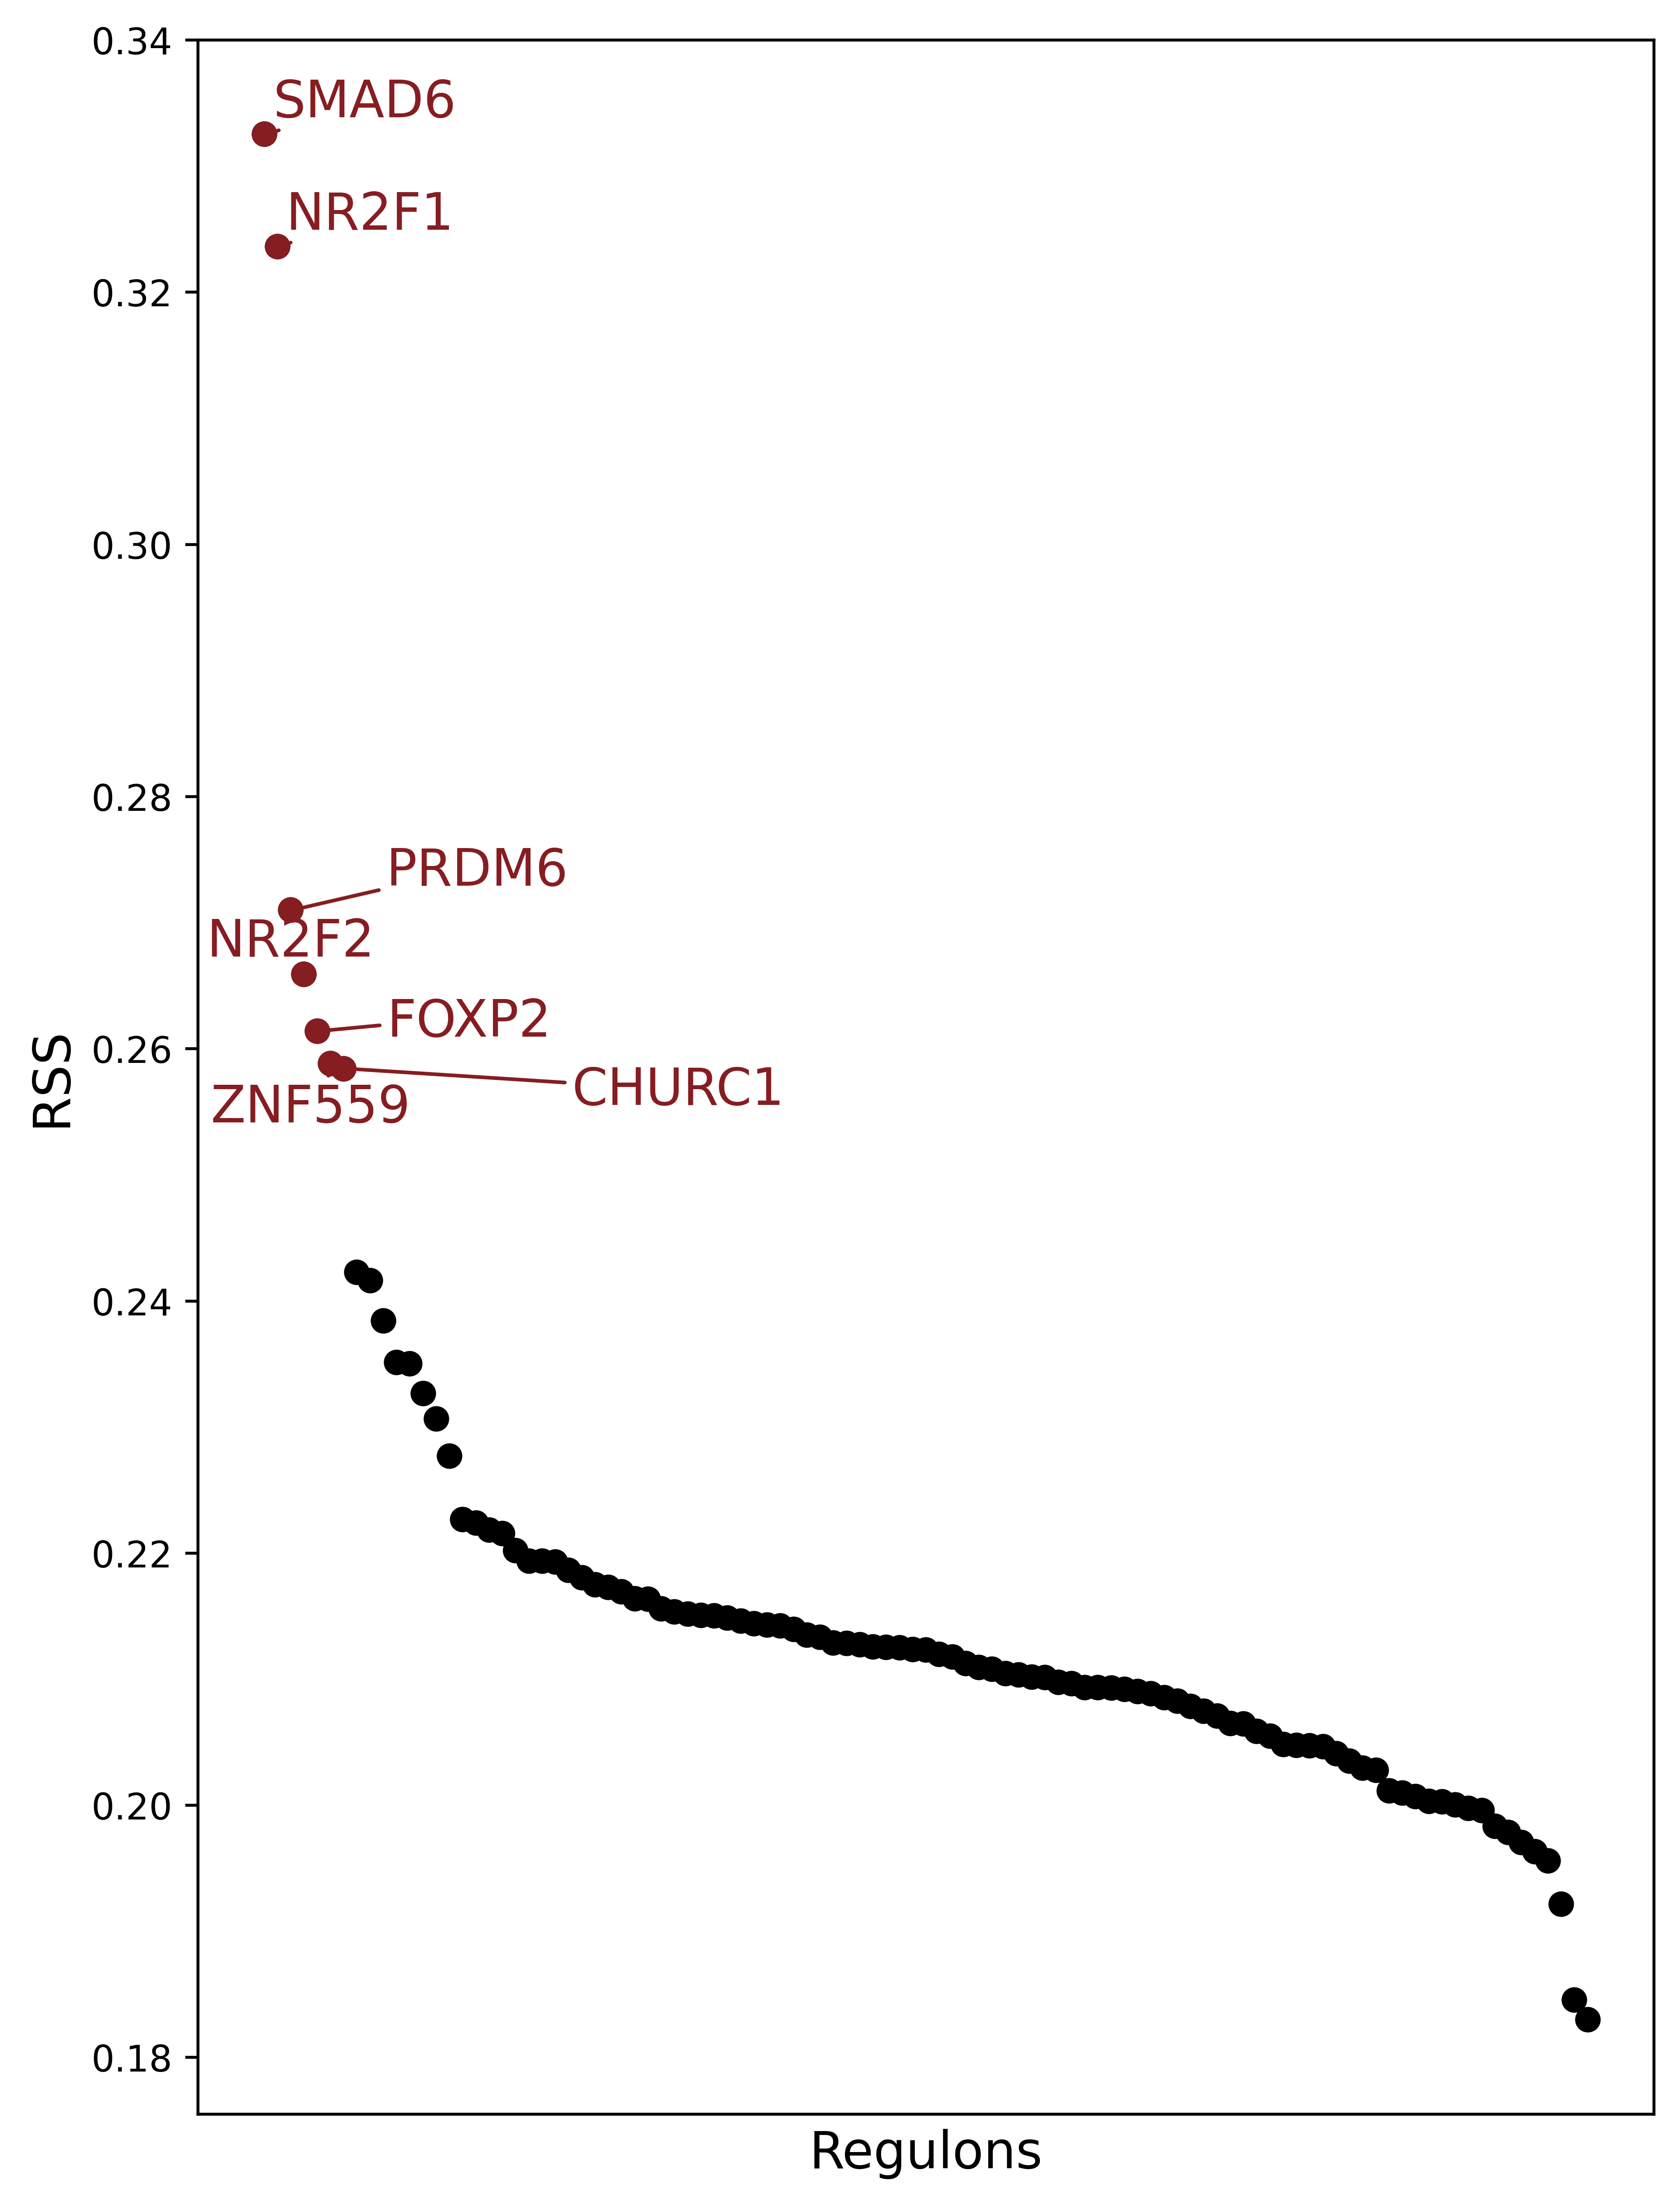

In [16]:
vals = rss_hsa[rss_hsa.index == 'SA node'].T
vals = vals.sort_values(by='SA node', ascending=False)
vals = vals.reset_index()
vals['x'] = vals.index

plt.figure(figsize=(6.5, 8.5), dpi=600)
plt.scatter(vals['x'], vals['SA node'], color='black')
plt.xticks([])
plt.ylabel('RSS', fontsize=14)
plt.xlabel('Regulons', fontsize=14)

top = vals.head(7)
plt.scatter(top['x'], top['SA node'], color='#861d21')

texts = []
offset = 0.3  # small offset to the right
for i, row in top.iterrows():
    txt = plt.annotate(
        row['index'],
        xy=(row['x'], row['SA node']),
        xytext=(row['x'] + offset, row['SA node']),
        textcoords='data',
        ha='left',
        va='center',
        color='#861d21',
        fontsize=14
    )
    texts.append(txt)

adjust_text(
    texts,
    add_objects=[plt.scatter(vals['x'], vals['SA node'], s=0)],  # include points to avoid overlaps
    force_text=0.1,  
    force_points=0.1, 
    expand_text=(1.02, 1.2), 
    lim=1000, 
    arrowprops=dict(arrowstyle='-', color='#861d21'),
)

plt.tight_layout()
plt.savefig(
    '/Users/marwanbakr/docs/kimlab/manuscripts/2024 CCS comparative/figures/fig4/adult_rss_san.tiff',
    format='tiff',
    dpi=600,
    bbox_inches='tight'
)
plt.show()

In [135]:
vals.head(20)

,SA node
SMAD6,0.332528
NR2F1,0.323636
PRDM6,0.271024
NR2F2,0.265910
FOXP2,0.261402
ZNF559,0.258825
CHURC1,0.258406
NFATC2,0.242288
NKX2-5,0.241626
ZNF536,0.238417


/Users/marwanbakr/anaconda3/lib/python3.10/site-packages/matplotlib/transforms.py:614: RuntimeWarning: invalid value encountered in scalar subtract
  deltaw = (sw * width - width) / 2.0
/Users/marwanbakr/anaconda3/lib/python3.10/site-packages/matplotlib/transforms.py:615: RuntimeWarning: invalid value encountered in scalar subtract
  deltah = (sh * height - height) / 2.0


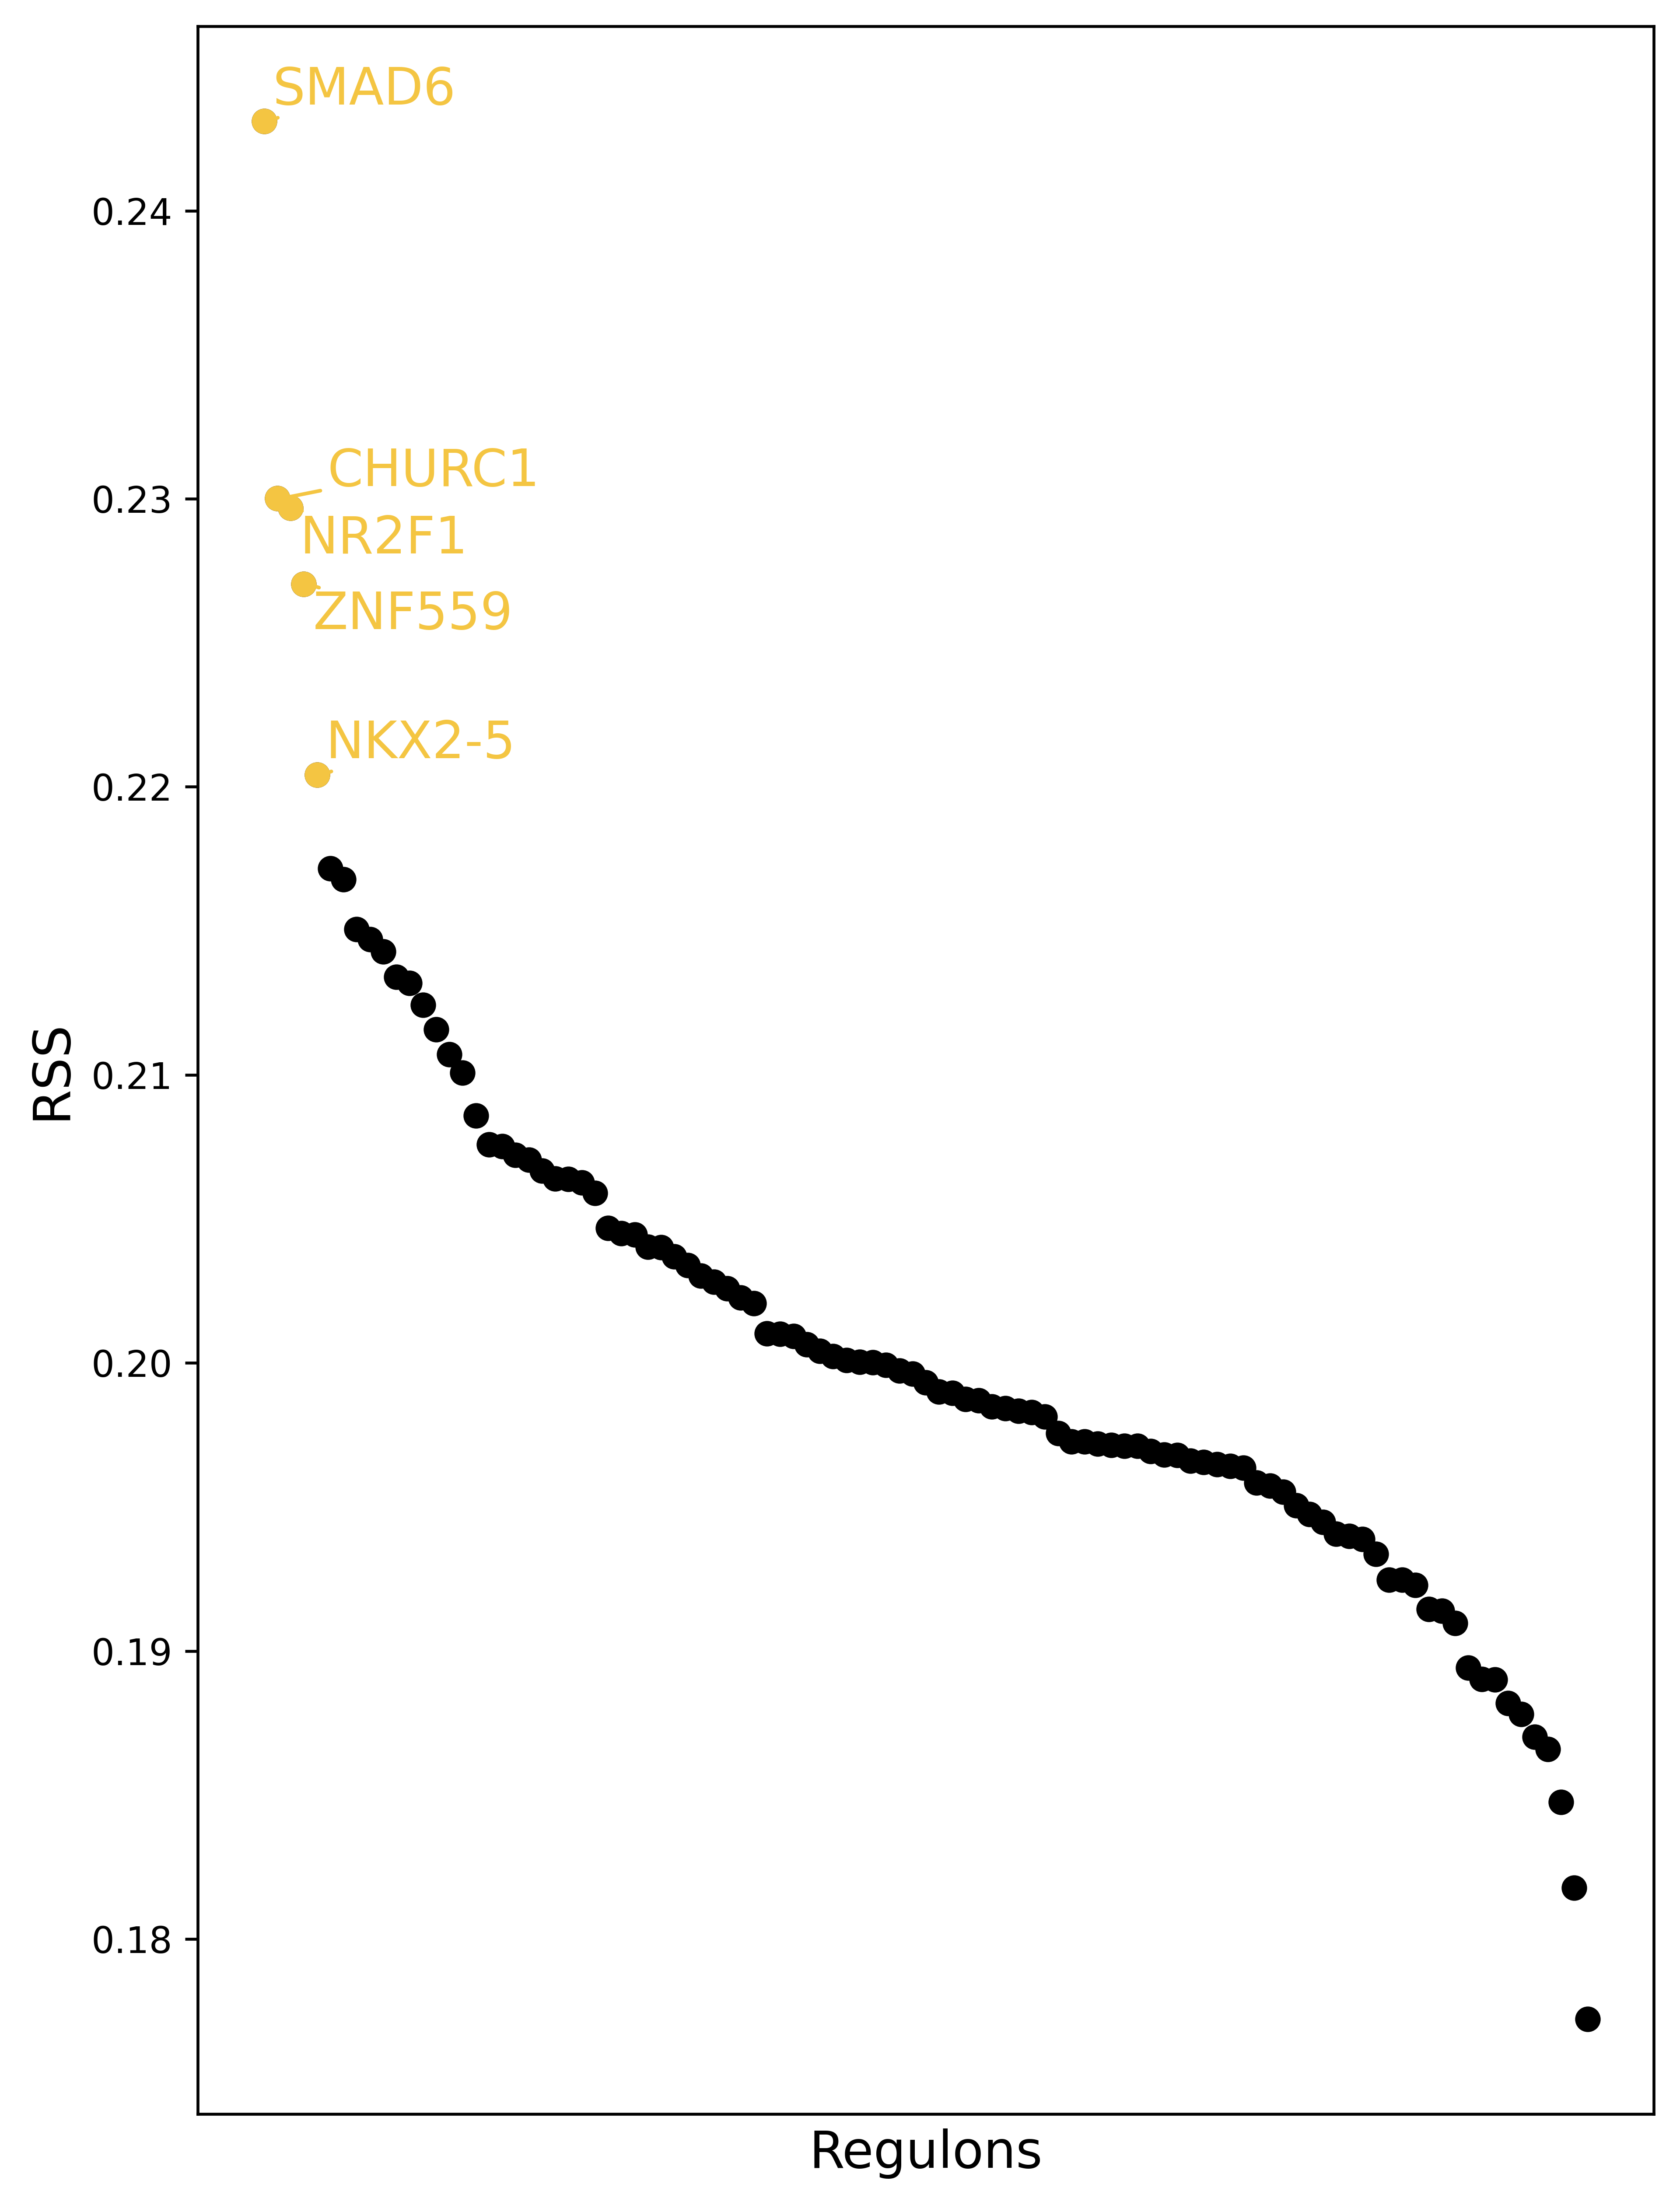

In [20]:
vals = rss_hsa[rss_hsa.index == 'Compact AV node'].T
vals = vals.sort_values(by='Compact AV node', ascending=False)
vals = vals.reset_index()
vals['x'] = vals.index

plt.figure(figsize=(6.5, 8.5), dpi=600)
plt.scatter(vals['x'], vals['Compact AV node'], color='black')
plt.xticks([])
plt.ylabel('RSS', fontsize=14)
plt.xlabel('Regulons', fontsize=14)

top = vals.head(5)
plt.scatter(top['x'], top['Compact AV node'], color='#F4C542')

texts = []
offset = 0.3  # small offset to the right
for i, row in top.iterrows():
    txt = plt.annotate(
        row['index'],
        xy=(row['x'], row['Compact AV node']),
        xytext=(row['x'] + offset, row['Compact AV node']),
        textcoords='data',
        ha='left',
        va='center',
        color='#F4C542',
        fontsize=14
    )
    texts.append(txt)

adjust_text(
    texts,
    add_objects=[plt.scatter(vals['x'], vals['Compact AV node'], s=0)],  # include points to avoid overlaps
    force_text=0.2,  
    force_points=0.1, 
    expand_text=(1.1, 1.2), 
    lim=1000, 
    arrowprops=dict(arrowstyle='-', color='#F4C542'),
)

plt.tight_layout()
plt.savefig(
    '/Users/marwanbakr/docs/kimlab/manuscripts/2024 CCS comparative/figures/fig4/adult_rss_avn.tiff',
    format='tiff',
    dpi=600,
    bbox_inches='tight'
)
plt.show()

In [137]:
vals.head(20)

,Compact AV node
SMAD6,0.243110
CHURC1,0.230010
NR2F1,0.229684
ZNF559,0.227040
NKX2-5,0.220412
FOXP2,0.217172
CREB3L2,0.216792
NFATC2,0.215062
ZNF655,0.214700
NR2F2,0.214278


/Users/marwanbakr/anaconda3/lib/python3.10/site-packages/matplotlib/transforms.py:614: RuntimeWarning: invalid value encountered in scalar subtract
  deltaw = (sw * width - width) / 2.0
/Users/marwanbakr/anaconda3/lib/python3.10/site-packages/matplotlib/transforms.py:615: RuntimeWarning: invalid value encountered in scalar subtract
  deltah = (sh * height - height) / 2.0


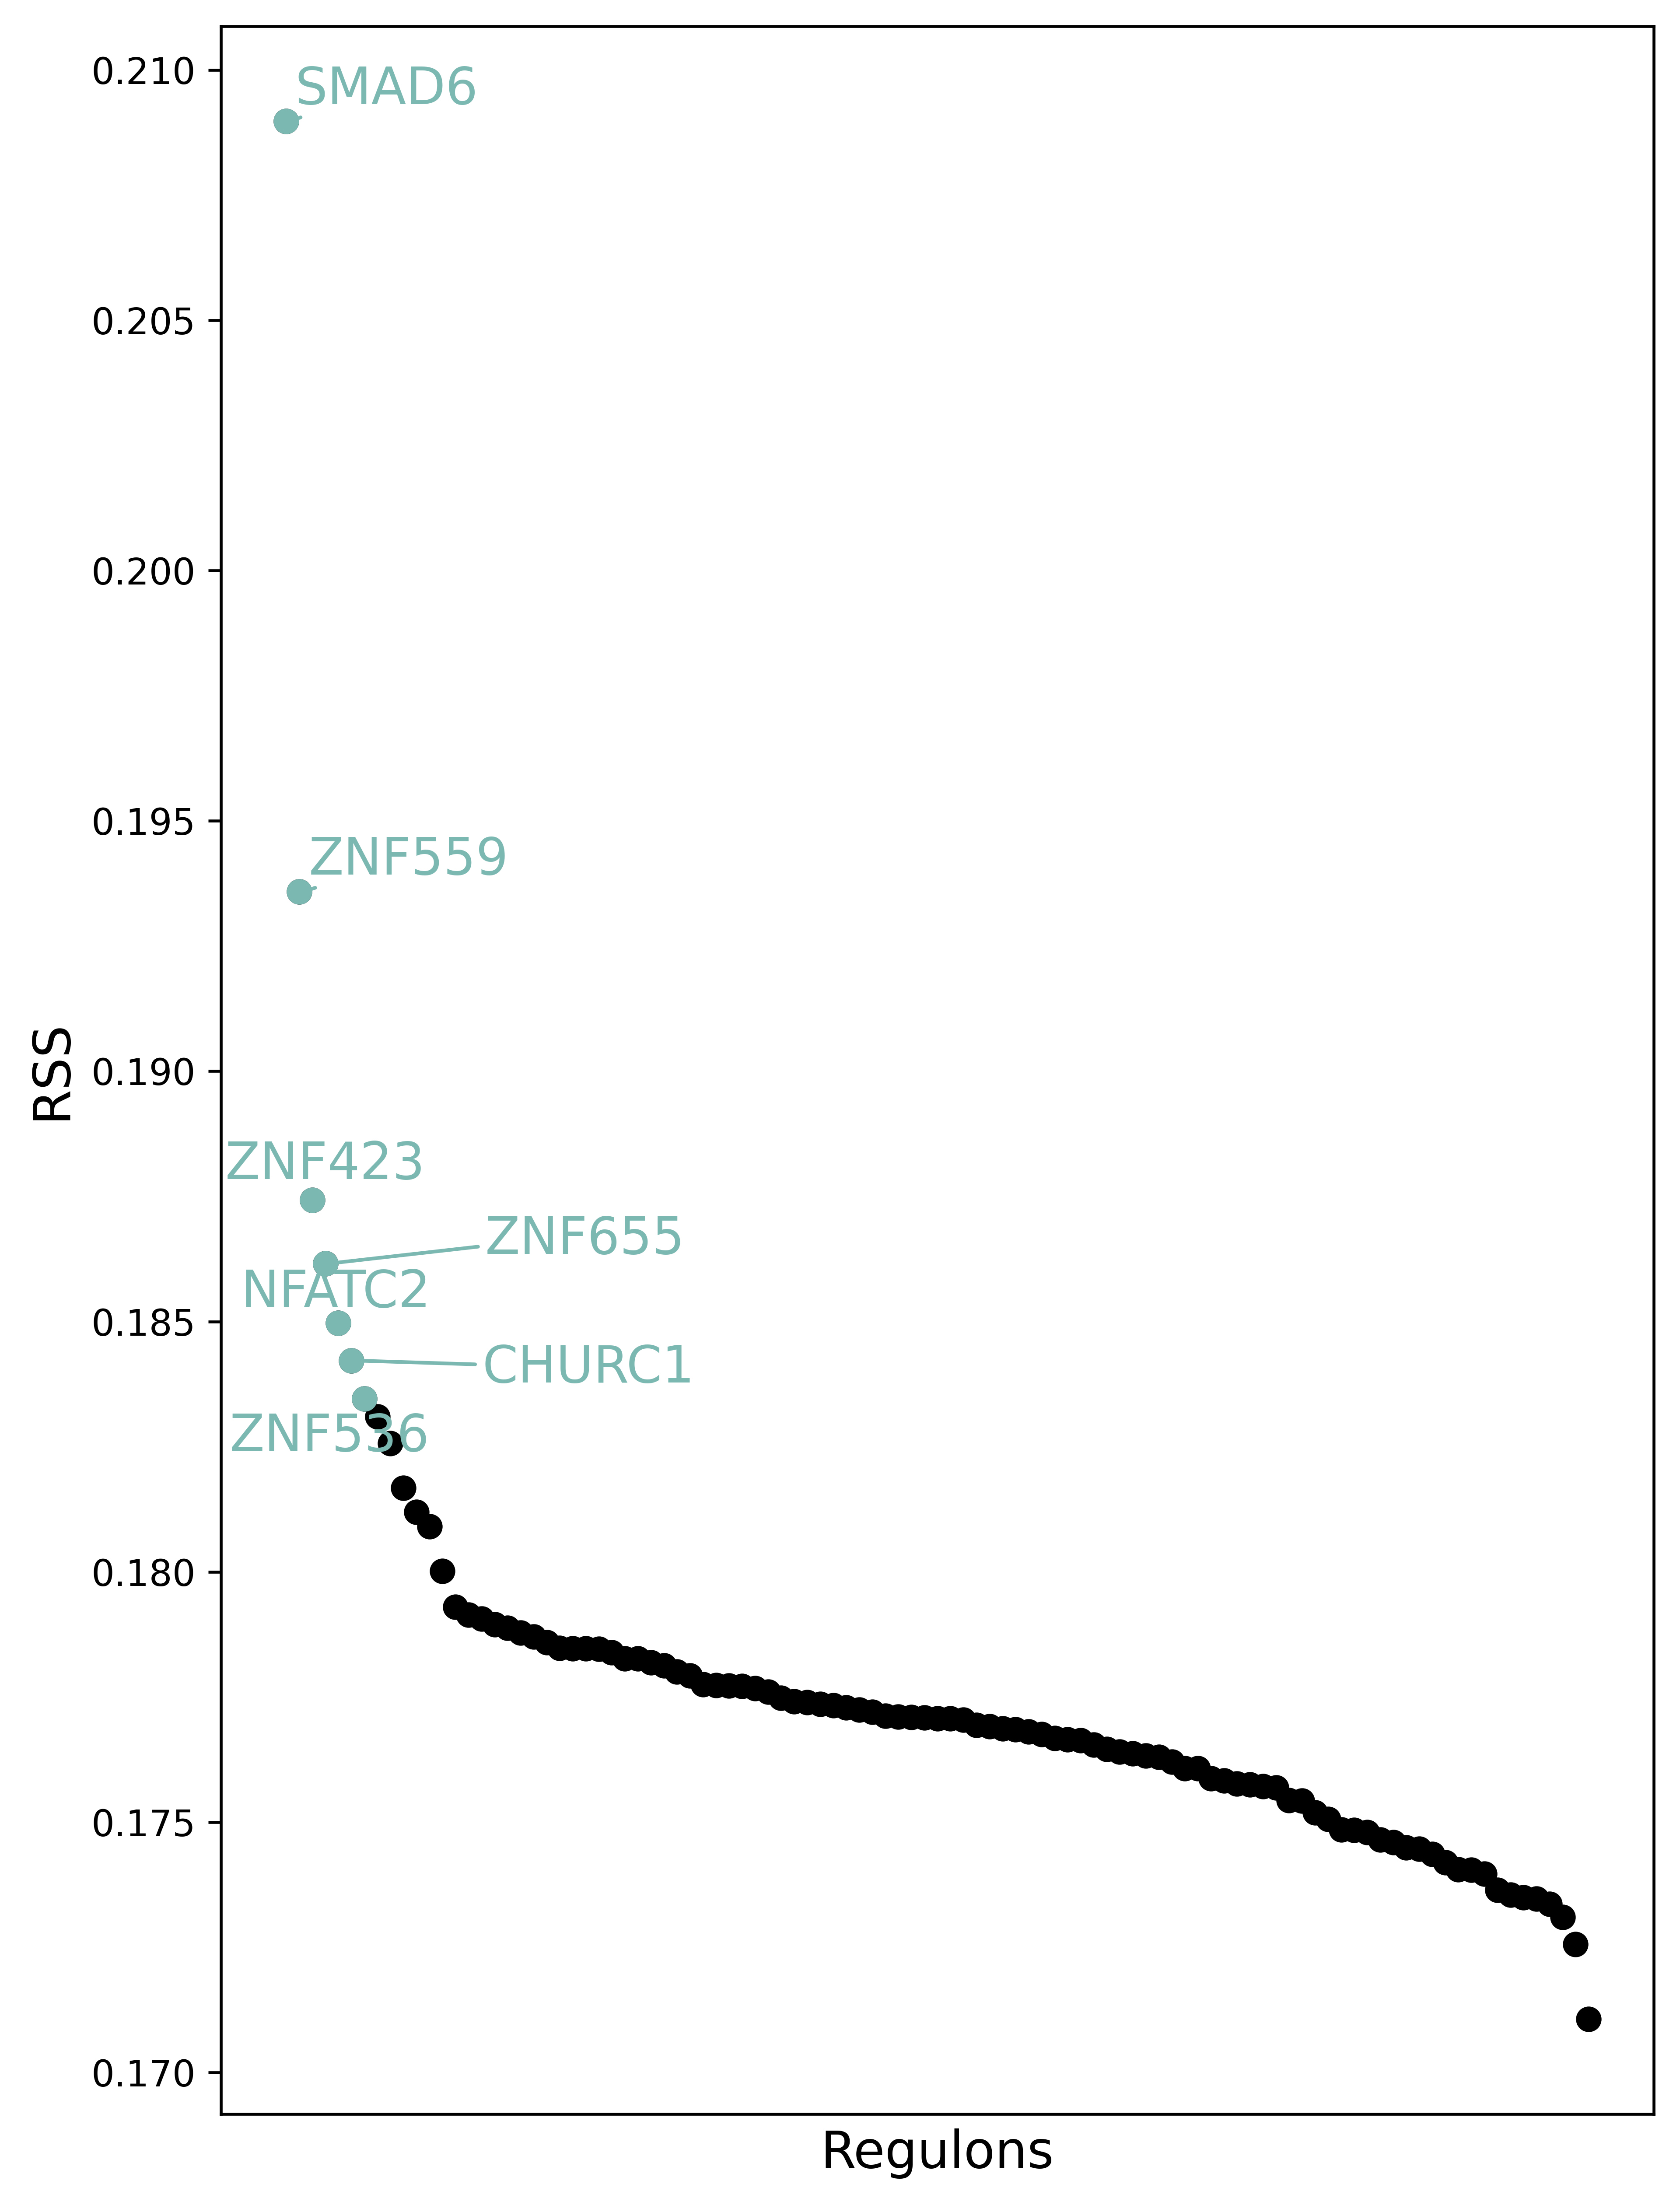

In [22]:
vals = rss_hsa[rss_hsa.index == 'His bundle'].T
vals = vals.sort_values(by='His bundle', ascending=False)
vals = vals.reset_index()
vals['x'] = vals.index

plt.figure(figsize=(6.5, 8.5), dpi=600)
plt.scatter(vals['x'], vals['His bundle'], color='black')
plt.xticks([])
plt.ylabel('RSS', fontsize=14)
plt.xlabel('Regulons', fontsize=14)

top = vals.head(7)
plt.scatter(top['x'], top['His bundle'], color='#7CB8B2')

texts = []
offset = 0.3  # small offset to the right
for i, row in top.iterrows():
    txt = plt.annotate(
        row['index'],
        xy=(row['x'], row['His bundle']),
        xytext=(row['x'] + offset, row['His bundle']),
        textcoords='data',
        ha='left',
        va='center',
        color='#7CB8B2',
        fontsize=14
    )
    texts.append(txt)

adjust_text(
    texts,
    add_objects=[plt.scatter(vals['x'], vals['His bundle'], s=0)],  # include points to avoid overlaps
    force_text=0.2,  
    force_points=0.1, 
    expand_text=(1.2, 1.2), 
    lim=1000, 
    arrowprops=dict(arrowstyle='-', color='#7CB8B2'),
)

plt.tight_layout()
plt.savefig(
    '/Users/marwanbakr/docs/kimlab/manuscripts/2024 CCS comparative/figures/fig4/adult_rss_his.tiff',
    format='tiff',
    dpi=600,
    bbox_inches='tight'
)
plt.show()

In [140]:
vals.head(20)

,His bundle
SMAD6,0.208976
ZNF559,0.193584
ZNF423,0.187430
ZNF655,0.186159
NFATC2,0.184972
CHURC1,0.184220
ZNF536,0.183456
SATB1,0.183099
FOXP2,0.182569
SMAD9,0.181677


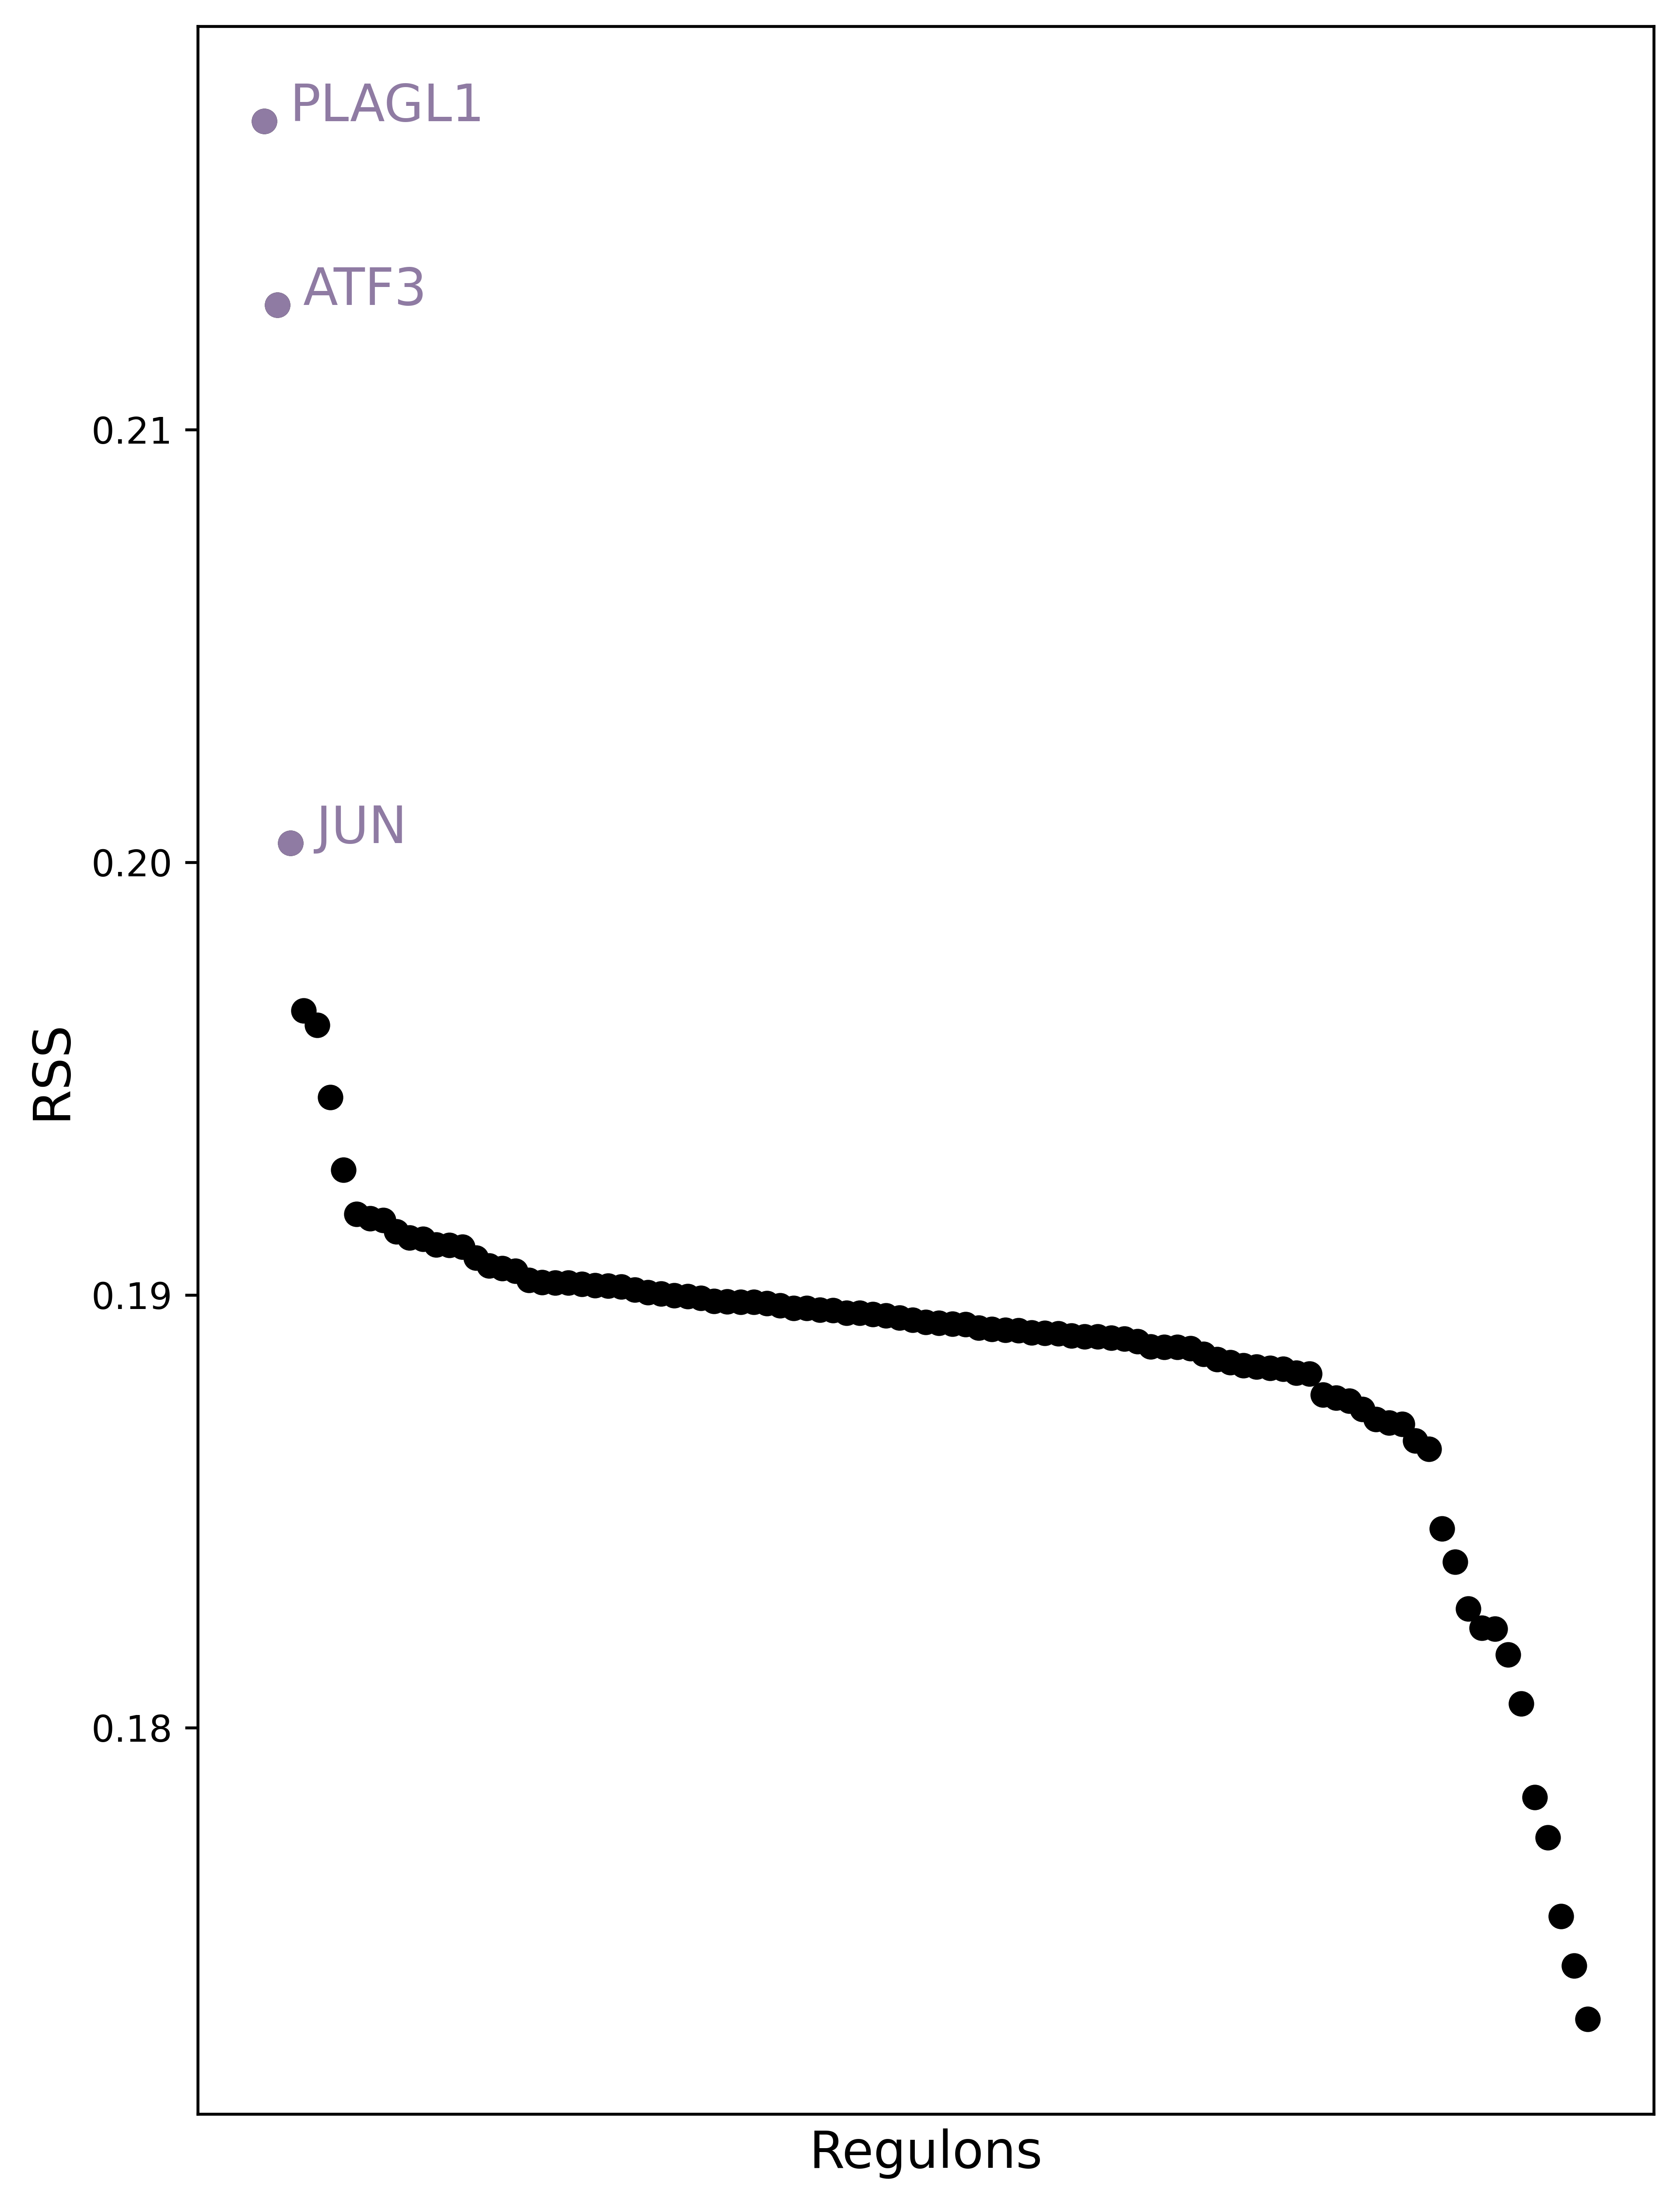

In [23]:
vals = rss_hsa[rss_hsa.index == 'Purkinje fibers'].T

# sorting values in decreasing order
vals = vals.sort_values(by='Purkinje fibers', ascending=False)

# plotting
plt.figure(figsize=(6.5, 8.5), dpi=600)
plt.scatter(vals.index, vals['Purkinje fibers'], color='black')
plt.xticks([]) 
plt.ylabel('RSS', fontsize=14)
plt.xlabel('Regulons', fontsize=14)

# labeling the top points
top = vals.head(3)
plt.scatter(top.index, top['Purkinje fibers'], color='#8F7BA3')
for i, value in enumerate(top['Purkinje fibers']):
    plt.annotate(top.index[i], (top.index[i], value), 
                 textcoords="offset points", 
                 xytext=(7, 0), 
                 ha='left',
                 color='#8F7BA3',
                 fontsize=14)

plt.tight_layout()
plt.savefig('/Users/marwanbakr/docs/kimlab/manuscripts/2024 CCS comparative/figures/fig4/adult_rss_pf.tiff', format='tiff', dpi=600, bbox_inches='tight')
plt.show()

In [142]:
vals.head(20)

,Purkinje fibers
PLAGL1,0.217135
ATF3,0.212889
JUN,0.200447
SMAD6,0.196571
KLF6,0.196234
JUNB,0.194572
FOS,0.192888
RFX2,0.191867
FOXO3,0.191773
ZEB1,0.191731
